# Applying Classification Modeling
The goal of this week's assessment is to find the model which best predicts whether a person will default on their loan. In doing so, we want to utilize all of the different tools we have learned over the course: data cleaning, EDA, feature engineering/transformation, feature selection, hyperparameter tuning, and model evaluation. 

You will fit three different models (KNN, Logistic Regression, and Decision Tree Classifier) and use gridsearch to find the best hyperparameters for those models. Then you will compare the performance of those three models on a test set to find the best one.  


## Import libraries and data

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('dem_candidates2.csv')

In [159]:
df2=pd.read_csv('2016-precinct-house.csv',encoding="ISO-8859-1")

In [5]:
df3=pd.read_csv('election-context-2018.csv')

## 1. Data Cleaning

### Dem Midterm Primary 2018 Data

In [6]:
df.head()

Candidate State             District Office Type Race Type  \
0  Anthony White (Alabama)    AL  Governor of Alabama    Governor   Regular   
1   Christopher Countryman    AL  Governor of Alabama    Governor   Regular   
2    Doug "New Blue" Smith    AL  Governor of Alabama    Governor   Regular   
3          James C. Fields    AL  Governor of Alabama    Governor   Regular   
4            Sue Bell Cobb    AL  Governor of Alabama    Governor   Regular   

  Race Primary Election Date Primary Status Primary Runoff Status  \
0                     6/5/18           Lost                  None   
1                     6/5/18           Lost                  None   
2                     6/5/18           Lost                  None   
3                     6/5/18           Lost                  None   
4                     6/5/18           Lost                  None   

  General Status  Partisan Lean  ...  Biden Endorsed? Warren Endorsed?   \
0           None     -28.879999  ...              NaN               NaN   
1           None     -28.879999  ...              NaN               NaN   
2           None     -28.879999  ...              NaN               NaN   
3           None     -28.879999  ...              NaN               NaN   
4           None     -28.879999  ...              NaN               NaN   

  Sanders Endorsed? Our Revolution Endorsed? Justice Dems Endorsed?  \
0               NaN                      NaN                    NaN   
1               NaN                      NaN                    NaN   
2               NaN                      NaN                    NaN   
3               NaN                      NaN                    NaN   
4               NaN                      NaN                    NaN   

  PCCC Endorsed? Indivisible Endorsed? WFP Endorsed? VoteVets Endorsed?  \
0            NaN                   NaN           NaN                NaN   
1            NaN                   NaN           NaN                NaN   
2            NaN                   NaN           NaN                NaN   
3            NaN                   NaN           NaN                NaN   
4            NaN                   NaN           NaN                NaN   

  No Labels Support?  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  

[5 rows x 33 columns]

In [7]:
df.columns

Index(['Candidate', 'State', 'District', 'Office Type', 'Race Type',
       'Race Primary Election Date', 'Primary Status', 'Primary Runoff Status',
       'General Status', 'Partisan Lean', 'Primary %', 'Won Primary', 'Gender',
       'Race', 'Veteran?', 'LGBTQ?', 'Elected Official?', 'Self-Funder?',
       'STEM?', 'Obama Alum?', 'Party Support?', 'Emily Endorsed?',
       'Guns Sense Candidate?', 'Biden Endorsed?', 'Warren Endorsed? ',
       'Sanders Endorsed?', 'Our Revolution Endorsed?',
       'Justice Dems Endorsed?', 'PCCC Endorsed?', 'Indivisible Endorsed?',
       'WFP Endorsed?', 'VoteVets Endorsed?', 'No Labels Support?'],
      dtype='object')

Text(0.5, 1.0, 'Missing Data')

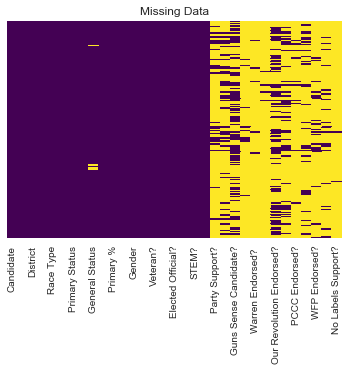

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing Data')

In [10]:
dem_primary_2018=df[['Candidate', 'State', 'District', 'Office Type',
        'Partisan Lean', 'Primary %', 'Won Primary','Gender', 'Race',
       'Veteran?', 'LGBTQ?', 'Elected Official?', 'Self-Funder?', 'STEM?','Obama Alum?']]

In [212]:
dem_primary_2018.head(10)

Candidate State                       District  \
0  Anthony White (Alabama)    AL            Governor of Alabama   
1   Christopher Countryman    AL            Governor of Alabama   
2    Doug "New Blue" Smith    AL            Governor of Alabama   
3          James C. Fields    AL            Governor of Alabama   
4            Sue Bell Cobb    AL            Governor of Alabama   
5              Walt Maddox    AL            Governor of Alabama   
6  Lizzetta Hill McConnell    AL  U.S. House Alabama District 1   
7       Robert Kennedy Jr.    AL  U.S. House Alabama District 1   
8     Audri Scott Williams    AL  U.S. House Alabama District 2   
9            Tabitha Isner    AL  U.S. House Alabama District 2   

      Office Type  Partisan Lean  Primary % Won Primary  Gender      Race  \
0        Governor     -28.879999   3.420000          No    Male  Nonwhite   
1        Governor     -28.879999   1.740000          No    Male     White   
2        Governor     -28.879999   3.270000          No    Male     White   
3        Governor     -28.879999   8.000000          No    Male  Nonwhite   
4        Governor     -28.879999  28.980000          No  Female     White   
5        Governor     -28.879999  54.599998         Yes    Male     White   
6  Representative     -30.680000  19.230000          No  Female  Nonwhite   
7  Representative     -30.680000  80.769997         Yes    Male  Nonwhite   
8  Representative     -33.080002  39.560001          No  Female  Nonwhite   
9  Representative     -33.080002  60.439999         Yes  Female     White   

  Veteran? LGBTQ? Elected Official? Self-Funder? STEM? Obama Alum?  
0      Yes     No                No           No    No          No  
1       No    Yes                No           No    No          No  
2      Yes     No                No           No    No          No  
3      Yes     No               Yes           No    No          No  
4       No     No               Yes           No    No          No  
5       No     No               Yes           No    No          No  
6       No     No                No           No   Yes          No  
7      Yes     No                No           No    No          No  
8      Yes     No                No           No    No          No  
9       No     No                No           No    No          No

Text(0.5, 1.0, 'Missing Data')

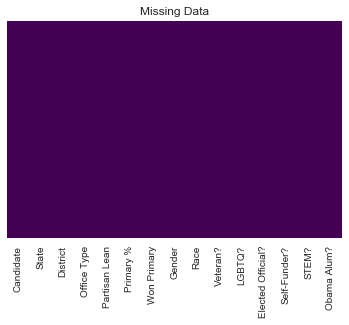

In [12]:
sns.heatmap(dem_primary_2018.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing Data')

In [13]:
dem_primary_2018.State.unique()

array(['AL', 'AR', 'AZ', 'CA', 'CO', 'GA', 'IA', 'ID', 'IL', 'IN', 'KS',
       'KY', 'MD', 'ME', 'MI', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NJ',
       'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'WA', 'WV'], dtype=object)

In [237]:
len(dem_primary_2018[dem_primary_2018.District.str.contains("House")])

676

In [328]:
dem_primary_2018[dem_primary_2018.State=='ND']

Candidate State                                   District  \
377  Mac Schneider    ND  U.S. House North Dakota At-large District   

        Office Type  Partisan Lean  Primary % Won Primary Gender   Race  \
377  Representative     -34.779999      100.0         Yes   Male  White   

    Veteran? LGBTQ? Elected Official? Self-Funder? STEM? Obama Alum?  
377       No     No               Yes           No    No          No

### Congressional Districts by County Data

In [27]:
df2.columns

Index(['year', 'stage', 'special', 'state', 'state_postal', 'state_fips',
       'state_icpsr', 'county_name', 'county_fips', 'county_ansi',
       'county_lat', 'county_long', 'jurisdiction', 'precinct', 'candidate',
       'candidate_normalized', 'office', 'district', 'writein', 'party',
       'mode', 'votes', 'candidate_opensecrets', 'candidate_wikidata',
       'candidate_party', 'candidate_last', 'candidate_first',
       'candidate_middle', 'candidate_full', 'candidate_suffix',
       'candidate_nickname', 'candidate_fec', 'candidate_fec_name',
       'candidate_google', 'candidate_govtrack', 'candidate_icpsr',
       'candidate_maplight'],
      dtype='object')

Text(0.5, 1.0, 'Missing Data')

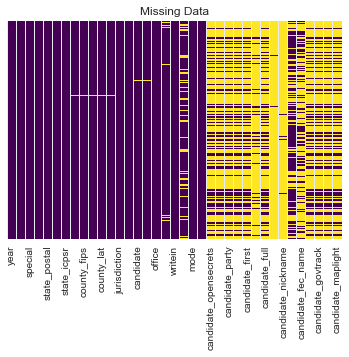

In [26]:
sns.heatmap(df2.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing Data')

In [161]:
df2.shape

(1127515, 37)

In [160]:
df2.state_postal.unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [162]:
df2 = df2[['state', 'state_postal', 'county_fips',
           'jurisdiction', 'office', 'district']]

In [163]:
df2 = df2[df2.state_postal.isin(['AL', 'AR', 'AZ', 'CA', 'CO', 'GA', 'IA', 'ID', 'IL', 'IN', 'KS',
                                 'KY', 'MD', 'ME', 'MI', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NJ',
                                 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'SC', 'SD', 'TN', 'TX',
                                 'UT', 'VA', 'WA', 'WV'])]

In [164]:
df2 = df2[df2.office.isin(['US House'])]

In [165]:
df2.head()

state state_postal  county_fips jurisdiction    office  district
0  Alabama           AL       1001.0      Autauga  US House       2.0
3  Alabama           AL       1001.0      Autauga  US House       2.0
4  Alabama           AL       1001.0      Autauga  US House       2.0
5  Alabama           AL       1001.0      Autauga  US House       2.0
8  Alabama           AL       1001.0      Autauga  US House       2.0

Text(0.5, 1.0, 'Missing Data')

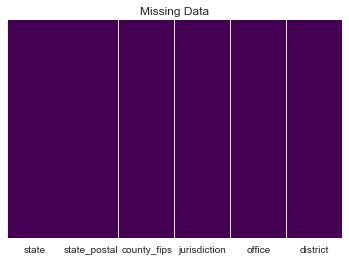

In [166]:
sns.heatmap(df2.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data')

In [167]:
df2 = df2.dropna()

In [168]:
df2 = df2.drop_duplicates()

In [169]:
df2.shape

(4999, 6)

In [172]:
df2.district = df2.district.astype(int)

In [173]:
df2.district = df2.district.astype(str)

In [174]:
df2.county_fips = df2.county_fips.astype(int)

In [175]:
df2['House_District'] = df2[['office', 'district']].apply(
    lambda x: ' '.join(x), axis=1)

In [176]:
df2 = df2.drop(columns=['office', 'district'])

In [177]:
df2.House_District = df2.House_District.apply(
    lambda x: x.replace('US House', 'U.S. House District'))

In [178]:
df2.reset_index(drop=True)

state state_postal  county_fips jurisdiction  \
0           Alabama           AL         1001      Autauga   
1           Alabama           AL         1003      Baldwin   
2           Alabama           AL         1005      Barbour   
3           Alabama           AL         1007         Bibb   
4           Alabama           AL         1009       Blount   
5           Alabama           AL         1009       Blount   
6           Alabama           AL         1011      Bullock   
7           Alabama           AL         1013       Butler   
8           Alabama           AL         1015      Calhoun   
9           Alabama           AL         1017     Chambers   
10          Alabama           AL         1019     Cherokee   
11          Alabama           AL         1019     Cherokee   
12          Alabama           AL         1021      Chilton   
13          Alabama           AL         1023      Choctaw   
14          Alabama           AL         1025       Clarke   
15          Alabama           AL         1025       Clarke   
16          Alabama           AL         1027         Clay   
17          Alabama           AL         1029     Cleburne   
18          Alabama           AL         1031       Coffee   
19          Alabama           AL         1033      Colbert   
20          Alabama           AL         1035      Conecuh   
21          Alabama           AL         1037        Coosa   
22          Alabama           AL         1039    Covington   
23          Alabama           AL         1041     Crenshaw   
24          Alabama           AL         1043      Cullman   
25          Alabama           AL         1045         Dale   
26          Alabama           AL         1047       Dallas   
27          Alabama           AL         1049       DeKalb   
28          Alabama           AL         1051       Elmore   
29          Alabama           AL         1053     Escambia   
...             ...          ...          ...          ...   
4969  West Virginia           WV        54053        Mason   
4970  West Virginia           WV        54047     Mcdowell   
4971  West Virginia           WV        54055       Mercer   
4972  West Virginia           WV        54057      Mineral   
4973  West Virginia           WV        54059        Mingo   
4974  West Virginia           WV        54061   Monongalia   
4975  West Virginia           WV        54063       Monroe   
4976  West Virginia           WV        54065       Morgan   
4977  West Virginia           WV        54067     Nicholas   
4978  West Virginia           WV        54069         Ohio   
4979  West Virginia           WV        54071    Pendleton   
4980  West Virginia           WV        54073    Pleasants   
4981  West Virginia           WV        54075   Pocahontas   
4982  West Virginia           WV        54077      Preston   
4983  West Virginia           WV        54079       Putnam   
4984  West Virginia           WV        54081      Raleigh   
4985  West Virginia           WV        54083     Randolph   
4986  West Virginia           WV        54085      Ritchie   
4987  West Virginia           WV        54087        Roane   
4988  West Virginia           WV        54089      Summers   
4989  West Virginia           WV        54091       Taylor   
4990  West Virginia           WV        54093       Tucker   
4991  West Virginia           WV        54095        Tyler   
4992  West Virginia           WV        54097       Upshur   
4993  West Virginia           WV        54099        Wayne   
4994  West Virginia           WV        54101      Webster   
4995  West Virginia           WV        54103       Wetzel   
4996  West Virginia           WV        54105         Wirt   
4997  West Virginia           WV        54107         Wood   
4998  West Virginia           WV        54109      Wyoming   

             House_District  
0     U.S. House District 2  
1     U.S. House District 1  
2     U.S. House District 2  
3     U.S. House District 6  
4     U.S. House Di

In [179]:
districts = []
for i in df2.index:
    districts.append(df2.loc[i].House_District.replace(
        'U.S. House District ', 'U.S. House {} District '.format(df2.loc[i].state)))
districts

['U.S. House Alabama District 2',
 'U.S. House Alabama District 1',
 'U.S. House Alabama District 2',
 'U.S. House Alabama District 6',
 'U.S. House Alabama District 4',
 'U.S. House Alabama District 6',
 'U.S. House Alabama District 2',
 'U.S. House Alabama District 2',
 'U.S. House Alabama District 3',
 'U.S. House Alabama District 3',
 'U.S. House Alabama District 3',
 'U.S. House Alabama District 4',
 'U.S. House Alabama District 6',
 'U.S. House Alabama District 7',
 'U.S. House Alabama District 1',
 'U.S. House Alabama District 7',
 'U.S. House Alabama District 3',
 'U.S. House Alabama District 3',
 'U.S. House Alabama District 2',
 'U.S. House Alabama District 4',
 'U.S. House Alabama District 2',
 'U.S. House Alabama District 6',
 'U.S. House Alabama District 2',
 'U.S. House Alabama District 2',
 'U.S. House Alabama District 4',
 'U.S. House Alabama District 2',
 'U.S. House Alabama District 7',
 'U.S. House Alabama District 4',
 'U.S. House Alabama District 2',
 'U.S. House A

In [180]:
df2.House_District = districts

In [185]:
cong_districts = df2

In [186]:
cong_districts.shape

(4999, 5)

In [207]:
len(cong_districts.county_fips.unique())

2731

In [238]:
len(cong_districts.House_District.unique())

360

### County Demographics Data

In [188]:
df3.columns

Index(['state', 'county', 'fips', 'trump16', 'clinton16', 'otherpres16',
       'romney12', 'obama12', 'otherpres12', 'demsen16', 'repsen16',
       'othersen16', 'demhouse16', 'rephouse16', 'otherhouse16', 'demgov16',
       'repgov16', 'othergov16', 'repgov14', 'demgov14', 'othergov14',
       'total_population', 'cvap', 'white_pct', 'black_pct', 'hispanic_pct',
       'nonwhite_pct', 'foreignborn_pct', 'female_pct', 'age29andunder_pct',
       'age65andolder_pct', 'median_hh_inc', 'clf_unemploy_pct', 'lesshs_pct',
       'lesscollege_pct', 'lesshs_whites_pct', 'lesscollege_whites_pct',
       'rural_pct', 'ruralurban_cc'],
      dtype='object')

In [193]:
df3=df3.drop(columns=['repgov14', 'demgov14', 'othergov14', 'ruralurban_cc','otherpres12', 'demsen16', 'repsen16',
       'othersen16', 'demhouse16', 'rephouse16', 'otherhouse16', 'demgov16',
       'repgov16', 'othergov16', 'repgov14', 'demgov14', 'othergov14','otherpres16'])

In [194]:
df3.columns

Index(['state', 'county', 'fips', 'trump16', 'clinton16', 'romney12',
       'obama12', 'total_population', 'cvap', 'white_pct', 'black_pct',
       'hispanic_pct', 'nonwhite_pct', 'foreignborn_pct', 'female_pct',
       'age29andunder_pct', 'age65andolder_pct', 'median_hh_inc',
       'clf_unemploy_pct', 'lesshs_pct', 'lesscollege_pct',
       'lesshs_whites_pct', 'lesscollege_whites_pct', 'rural_pct'],
      dtype='object')

In [197]:
df3=df3[df3.state.isin(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Maine', 'Maryland', 'Michigan', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Jersey',
       'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Virginia',
       'Washington', 'West Virginia'])]

In [206]:
len(df3.fips.unique())

2742

In [201]:
df3.shape

(2742, 24)

In [209]:
county_demo=df3

In [211]:
county_demo.head()

state   county  fips  trump16  clinton16  romney12  obama12  \
0  Alabama  Autauga  1001    18172       5936     17379     6363   
1  Alabama  Baldwin  1003    72883      18458     66016    18424   
2  Alabama  Barbour  1005     5454       4871      5550     5912   
3  Alabama     Bibb  1007     6738       1874      6132     2202   
4  Alabama   Blount  1009    22859       2156     20757     2970   

   total_population      cvap  white_pct  ...  female_pct  age29andunder_pct  \
0           55049.0   40690.0  75.683482  ...   51.176225          40.037058   
1          199510.0  151770.0  83.178788  ...   51.194928          35.474412   
2           26614.0   20375.0  45.885624  ...   46.498084          37.664387   
3           22572.0   17590.0  74.765196  ...   46.464646          37.329435   
4           57704.0   42430.0  87.657701  ...   50.485235          37.240053   

   age65andolder_pct  median_hh_inc  clf_unemploy_pct  lesshs_pct  \
0          13.978456        53099.0          5.591657   12.417046   
1          18.714851        51365.0          6.286843    9.972418   
2          16.528895        33956.0         12.824738   26.235928   
3          14.885699        39776.0          7.146827   19.301587   
4          17.192916        46212.0          5.953833   19.968585   

   lesscollege_pct  lesshs_whites_pct  lesscollege_whites_pct  rural_pct  
0        75.407229          10.002112               74.065601  42.002162  
1        70.452889           7.842227               68.405607  42.279099  
2        87.132213          19.579752               81.364746  67.789635  
3        88.000000          15.020490               87.471774  68.352607  
4        86.950243          16.643368               86.163610  89.951502  

[5 rows x 24 columns]

In [245]:
county_demo=county_demo.rename(index=str, columns={"fips": "county_fips"})

### Merging District Data with County Demographics

In [377]:
district_demo=pd.merge(cong_districts,county_demo,on='county_fips',how='left').drop(columns=['state_y','jurisdiction','state_x']).rename(columns={'state_postal':'State','House_District':'District',})

In [378]:
district_demo.columns

Index(['State', 'county_fips', 'District', 'county', 'trump16', 'clinton16',
       'romney12', 'obama12', 'total_population', 'cvap', 'white_pct',
       'black_pct', 'hispanic_pct', 'nonwhite_pct', 'foreignborn_pct',
       'female_pct', 'age29andunder_pct', 'age65andolder_pct', 'median_hh_inc',
       'clf_unemploy_pct', 'lesshs_pct', 'lesscollege_pct',
       'lesshs_whites_pct', 'lesscollege_whites_pct', 'rural_pct'],
      dtype='object')

In [379]:
district_demo.District=district_demo.District.apply(
    lambda x: x.replace('District 0','At-large District'))

In [381]:
district_demo[district_demo.State=='ND']

State  county_fips                                   District  \
2497    ND        38001  U.S. House North Dakota At-large District   
2498    ND        38003  U.S. House North Dakota At-large District   
2499    ND        38005  U.S. House North Dakota At-large District   
2500    ND        38007  U.S. House North Dakota At-large District   
2501    ND        38009  U.S. House North Dakota At-large District   
2502    ND        38011  U.S. House North Dakota At-large District   
2503    ND        38013  U.S. House North Dakota At-large District   
2504    ND        38015  U.S. House North Dakota At-large District   
2505    ND        38017  U.S. House North Dakota At-large District   
2506    ND        38019  U.S. House North Dakota At-large District   
2507    ND        38021  U.S. House North Dakota At-large District   
2508    ND        38023  U.S. House North Dakota At-large District   
2509    ND        38025  U.S. House North Dakota At-large District   
2510    ND        38027  U.S. House North Dakota At-large District   
2511    ND        38029  U.S. House North Dakota At-large District   
2512    ND        38031  U.S. House North Dakota At-large District   
2513    ND        38033  U.S. House North Dakota At-large District   
2514    ND        38035  U.S. House North Dakota At-large District   
2515    ND        38037  U.S. House North Dakota At-large District   
2516    ND        38039  U.S. House North Dakota At-large District   
2517    ND        38041  U.S. House North Dakota At-large District   
2518    ND        38043  U.S. House North Dakota At-large District   
2519    ND        38045  U.S. House North Dakota At-large District   
2520    ND        38047  U.S. House North Dakota At-large District   
2521    ND        38049  U.S. House North Dakota At-large District   
2522    ND        38051  U.S. House North Dakota At-large District   
2523    ND        38053  U.S. House North Dakota At-large District   
2524    ND        38055  U.S. House North Dakota At-large District   
2525    ND        38057  U.S. House North Dakota At-large District   
2526    ND        38059  U.S. House North Dakota At-large District   
2527    ND        38061  U.S. House North Dakota At-large District   
2528    ND        38063  U.S. House North Dakota At-large District   
2529    ND        38065  U.S. House North Dakota At-large District   
2530    ND        38067  U.S. House North Dakota At-large District   
2531    ND        38069  U.S. House North Dakota At-large District   
2532    ND        38071  U.S. House North Dakota At-large District   
2533    ND        38073  U.S. House North Dakota At-large District   
2534    ND        38075  U.S. House North Dakota At-large District   
2535    ND        38077  U.S. House North Dakota At-large District   
2536    ND        38079  U.S. House North Dakota At-large District   
2537    ND        38081  U.S. House North Dakota At-large District   
2538    ND        38083  U.S. House North Dakota At-large District   
2539    ND        38085  U.S. House North Dakota At-large District   
2540    ND        38087  U.S. House North Dakota At-large District   
2541    ND        38089  U.S. House North Dakota At-large District   
2542    ND        38091  U.S. House North Dakota At-large District   
2543    ND        38093  U.S. House North Dakota At-large District   
2544    ND        38095  U.S. House North Dakota At-large District   
2545    ND        38097  U.S. House North Dakota At-large District   
2546    ND        38099  U.S. House North Dakota At-large District   
2547    ND        38101  U.S. House North Dakota At-large District   
2548    ND        38103  U.S. House North Dakota At-large District   
2549    ND        38105  U.S. House North Dakota At-large District   

             county  trump16  clinton16  romney12  obama12  total_population  \
2497          Adams    909.0      216.0     918.0    328.0            2348.0   
2498         Barnes   3160.0     1597.0    2964.0   2394.0      

In [382]:
state_demo=district_demo.groupby('State').agg(
    {'county_fips':'mean', 'trump16':'sum',
       'clinton16':'sum', 'romney12':'sum', 'obama12':'sum', 'total_population':'sum', 'cvap':'sum',
       'white_pct':'mean', 'black_pct':'mean', 'hispanic_pct':'mean', 'nonwhite_pct':'mean',
       'foreignborn_pct':'mean', 'female_pct':'mean', 'age29andunder_pct':'mean',
       'age65andolder_pct':'mean', 'median_hh_inc':'mean', 'clf_unemploy_pct':'mean', 'lesshs_pct':'mean',
       'lesscollege_pct':'mean', 'lesshs_whites_pct':'mean', 'lesscollege_whites_pct':'mean',
       'rural_pct':'mean'})

In [383]:
district_demo=district_demo.groupby('District').agg(
    {'county_fips':'mean', 'trump16':'sum',
       'clinton16':'sum', 'romney12':'sum', 'obama12':'sum', 'total_population':'sum', 'cvap':'sum',
       'white_pct':'mean', 'black_pct':'mean', 'hispanic_pct':'mean', 'nonwhite_pct':'mean',
       'foreignborn_pct':'mean', 'female_pct':'mean', 'age29andunder_pct':'mean',
       'age65andolder_pct':'mean', 'median_hh_inc':'mean', 'clf_unemploy_pct':'mean', 'lesshs_pct':'mean',
       'lesscollege_pct':'mean', 'lesshs_whites_pct':'mean', 'lesscollege_whites_pct':'mean',
       'rural_pct':'mean'})

In [384]:
state_demo=state_demo.drop('county_fips',axis=1)

In [361]:
district_demo=district_demo.drop('county_fips',axis=1)

In [444]:
state_demo.head()

trump16   clinton16    romney12     obama12  total_population  \
State                                                                     
AL      1624371.0   1049139.0   1570192.0   1131048.0         6318571.0   
AR       745765.0    414354.0    706785.0    431659.0         3246061.0   
AZ      7133381.0   6711275.0   7107008.0   5811569.0        38828990.0   
CA     27656242.0  66683855.0  30873973.0  59606842.0       285102677.0   
CO      2032202.0   2391819.0   2035396.0   2353434.0         9369738.0   

              cvap  white_pct  black_pct  hispanic_pct  nonwhite_pct  ...  \
State                                                                 ...   
AL       4746280.0  65.195053  28.792347      3.232279     34.804947  ...   
AR       2377010.0  75.988946  15.962038      4.949779     24.011054  ...   
AZ      26168610.0  54.813084   2.691113     30.395579     45.186916  ...   
CA     176952445.0  46.346795   4.315412     34.639913     53.653205  ...   
CO       6612020.0  74.260696   1.738853     20.023190     25.739304  ...   

       female_pct  age29andunder_pct  age65andolder_pct  median_hh_inc  \
State                                                                    
AL      51.327904          37.978051          16.811869   39255.893333   
AR      50.577838          37.290976          18.274512   37496.112500   
AZ      49.806080          39.401028          18.403943   47223.066667   
CA      49.928737          40.189001          14.329789   61594.112903   
CO      48.626989          35.668748          16.560820   54886.040541   

       clf_unemploy_pct  lesshs_pct  lesscollege_pct  lesshs_whites_pct  \
State                                                                     
AL             9.953542   18.840458        82.546164          15.126964   
AR             8.072568   17.461241        84.485854          15.032359   
AZ             9.825836   15.597186        77.465699           7.740282   
CA             9.146370   17.425878        71.267332           6.359758   
CO             6.386869    9.526853        68.224182           5.023975   

       lesscollege_whites_pct  rural_pct  
State                                     
AL                  79.350384  65.063668  
AR                  83.083980  64.612389  
AZ                  71.311100  23.156101  
CA                  63.016986  16.332841  
CO                  64.128036  52.956162  

[5 rows x 21 columns]

Text(0.5, 1.0, 'Missing Data')

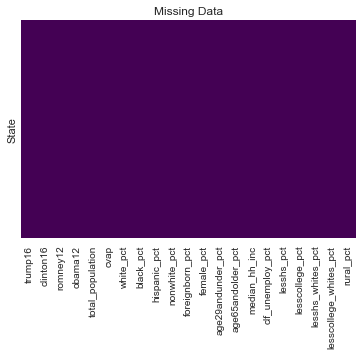

In [417]:
sns.heatmap(state_demo.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data')

In [362]:
district_demo.head()

trump16  clinton16  romney12   obama12  \
District                                                                 
U.S. House Alabama District 1  196911.0   107704.0  189168.0  116897.0   
U.S. House Alabama District 2  196234.0   120724.0  193585.0  135247.0   
U.S. House Alabama District 3  213495.0   145305.0  203531.0  160376.0   
U.S. House Alabama District 4  306535.0    84252.0  272325.0  103326.0   
U.S. House Alabama District 5  200644.0    97169.0  189920.0  103616.0   

                               total_population      cvap  white_pct  \
District                                                               
U.S. House Alabama District 1          715407.0  538955.0  62.421312   
U.S. House Alabama District 2          766884.0  577500.0  61.931329   
U.S. House Alabama District 3          895137.0  677725.0  65.919591   
U.S. House Alabama District 4          958907.0  722075.0  84.192999   
U.S. House Alabama District 5          705034.0  530290.0  78.794090   

                               black_pct  hispanic_pct  nonwhite_pct  ...  \
District                                                              ...   
U.S. House Alabama District 1  31.573636      1.859663     37.578688  ...   
U.S. House Alabama District 2  32.230394      2.894009     38.068671  ...   
U.S. House Alabama District 3  28.728380      2.642469     34.080409  ...   
U.S. House Alabama District 4   7.762323      5.089680     15.807001  ...   
U.S. House Alabama District 5  12.353722      4.659365     21.205910  ...   

                               female_pct  age29andunder_pct  \
District                                                       
U.S. House Alabama District 1   51.233432          37.559228   
U.S. House Alabama District 2   50.929505          38.372414   
U.S. House Alabama District 3   51.530851          38.391598   
U.S. House Alabama District 4   50.957847          36.702950   
U.S. House Alabama District 5   51.024700          37.420192   

                               age65andolder_pct  median_hh_inc  \
District                                                          
U.S. House Alabama District 1          17.083995   38195.333333   
U.S. House Alabama District 2          16.666009   39773.800000   
U.S. House Alabama District 3          16.572277   40161.307692   
U.S. House Alabama District 4          17.712331   39199.750000   
U.S. House Alabama District 5          16.019160   48045.400000   

                               clf_unemploy_pct  lesshs_pct  lesscollege_pct  \
District                                                                       
U.S. House Alabama District 1         14.212321   16.821231        83.693188   
U.S. House Alabama District 2          9.871923   19.053105        82.115139   
U.S. House Alabama District 3          8.769154   19.220803        82.191741   
U.S. House Alabama District 4          7.916884   20.467307        85.448173   
U.S. House Alabama District 5          8.091686   15.837995        76.076102   

                               lesshs_whites_pct  lesscollege_whites_pct  \
District                                                                   
U.S. House Alabama District 1          14.101545               80.603632   
U.S. House Alabama District 2          14.696447               78.455282   
U.S. House Alabama District 3          16.015776               79.880159   
U.S. House Alabama District 4          18.897830               84.637986   
U.S. House Alabama District 5          14.018572               74.537229   

                               rural_pct  
District                                  
U.S. House Alabama District 1  63.472636  
U.S. House Alabama District 2  60.576053  
U.S. House Alabama District 3  60.124535  
U.S. House Alabama District 4  72.872175  
U.S. House Alabama District 5  47.792088  

[5 rows x 21 columns]

Text(0.5, 1.0, 'Missing Data')

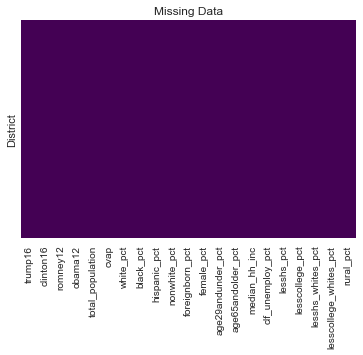

In [364]:
sns.heatmap(district_demo.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data')

### Merging Dem Primary Data with District Demographics

In [299]:
dem_primary_2018.head()

Candidate State             District Office Type  \
0  Anthony White (Alabama)    AL  Governor of Alabama    Governor   
1   Christopher Countryman    AL  Governor of Alabama    Governor   
2    Doug "New Blue" Smith    AL  Governor of Alabama    Governor   
3          James C. Fields    AL  Governor of Alabama    Governor   
4            Sue Bell Cobb    AL  Governor of Alabama    Governor   

   Partisan Lean  Primary % Won Primary  Gender      Race Veteran? LGBTQ?  \
0     -28.879999       3.42          No    Male  Nonwhite      Yes     No   
1     -28.879999       1.74          No    Male     White       No    Yes   
2     -28.879999       3.27          No    Male     White      Yes     No   
3     -28.879999       8.00          No    Male  Nonwhite      Yes     No   
4     -28.879999      28.98          No  Female     White       No     No   

  Elected Official? Self-Funder? STEM? Obama Alum?  
0                No           No    No          No  
1                No           No    No          No  
2                No           No    No          No  
3               Yes           No    No          No  
4               Yes           No    No          No

In [300]:
dem_primary_2018.shape

(800, 15)

In [296]:
district_demo.head()

trump16  clinton16  romney12   obama12  \
House_District                                                           
U.S. House Alabama District 1  196911.0   107704.0  189168.0  116897.0   
U.S. House Alabama District 2  196234.0   120724.0  193585.0  135247.0   
U.S. House Alabama District 3  213495.0   145305.0  203531.0  160376.0   
U.S. House Alabama District 4  306535.0    84252.0  272325.0  103326.0   
U.S. House Alabama District 5  200644.0    97169.0  189920.0  103616.0   

                               total_population      cvap  white_pct  \
House_District                                                         
U.S. House Alabama District 1          715407.0  538955.0  62.421312   
U.S. House Alabama District 2          766884.0  577500.0  61.931329   
U.S. House Alabama District 3          895137.0  677725.0  65.919591   
U.S. House Alabama District 4          958907.0  722075.0  84.192999   
U.S. House Alabama District 5          705034.0  530290.0  78.794090   

                               black_pct  hispanic_pct  nonwhite_pct  ...  \
House_District                                                        ...   
U.S. House Alabama District 1  31.573636      1.859663     37.578688  ...   
U.S. House Alabama District 2  32.230394      2.894009     38.068671  ...   
U.S. House Alabama District 3  28.728380      2.642469     34.080409  ...   
U.S. House Alabama District 4   7.762323      5.089680     15.807001  ...   
U.S. House Alabama District 5  12.353722      4.659365     21.205910  ...   

                               female_pct  age29andunder_pct  \
House_District                                                 
U.S. House Alabama District 1   51.233432          37.559228   
U.S. House Alabama District 2   50.929505          38.372414   
U.S. House Alabama District 3   51.530851          38.391598   
U.S. House Alabama District 4   50.957847          36.702950   
U.S. House Alabama District 5   51.024700          37.420192   

                               age65andolder_pct  median_hh_inc  \
House_District                                                    
U.S. House Alabama District 1          17.083995   38195.333333   
U.S. House Alabama District 2          16.666009   39773.800000   
U.S. House Alabama District 3          16.572277   40161.307692   
U.S. House Alabama District 4          17.712331   39199.750000   
U.S. House Alabama District 5          16.019160   48045.400000   

                               clf_unemploy_pct  lesshs_pct  lesscollege_pct  \
House_District                                                                 
U.S. House Alabama District 1         14.212321   16.821231        83.693188   
U.S. House Alabama District 2          9.871923   19.053105        82.115139   
U.S. House Alabama District 3          8.769154   19.220803        82.191741   
U.S. House Alabama District 4          7.916884   20.467307        85.448173   
U.S. House Alabama District 5          8.091686   15.837995        76.076102   

                               lesshs_whites_pct  lesscollege_whites_pct  \
House_District                                                             
U.S. House Alabama District 1          14.101545               80.603632   
U.S. House Alabama District 2          14.696447               78.455282   
U.S. House Alabama District 3          16.015776               79.880159   
U.S. House Alabama District 4          18.897830               84.637986   
U.S. House Alabama District 5          14.018572               74.537229   

                               rural_pct  
House_District                            
U.S. House Alabama District 1  63.472636  
U.S. House Alabama District 2  60.576053  
U.S. House Alabama District 3  60.124535  
U.S. House Alabama District 4  72.872175  
U.S. House Alabama District 5  47.792088  

[5 rows x 21 columns]

In [531]:
Dem_Midterm_Primary=pd.merge(dem_primary_2018,district_demo,on='District',how='left')

In [532]:
Dem_Midterm_Primary.columns

Index(['Candidate', 'State', 'District', 'Office Type', 'Partisan Lean',
       'Primary %', 'Won Primary', 'Gender', 'Race', 'Veteran?', 'LGBTQ?',
       'Elected Official?', 'Self-Funder?', 'STEM?', 'Obama Alum?',
       'county_fips', 'trump16', 'clinton16', 'romney12', 'obama12',
       'total_population', 'cvap', 'white_pct', 'black_pct', 'hispanic_pct',
       'nonwhite_pct', 'foreignborn_pct', 'female_pct', 'age29andunder_pct',
       'age65andolder_pct', 'median_hh_inc', 'clf_unemploy_pct', 'lesshs_pct',
       'lesscollege_pct', 'lesshs_whites_pct', 'lesscollege_whites_pct',
       'rural_pct'],
      dtype='object')

In [533]:
Dem_Midterm_Primary.head(10)

Candidate State                       District  \
0  Anthony White (Alabama)    AL            Governor of Alabama   
1   Christopher Countryman    AL            Governor of Alabama   
2    Doug "New Blue" Smith    AL            Governor of Alabama   
3          James C. Fields    AL            Governor of Alabama   
4            Sue Bell Cobb    AL            Governor of Alabama   
5              Walt Maddox    AL            Governor of Alabama   
6  Lizzetta Hill McConnell    AL  U.S. House Alabama District 1   
7       Robert Kennedy Jr.    AL  U.S. House Alabama District 1   
8     Audri Scott Williams    AL  U.S. House Alabama District 2   
9            Tabitha Isner    AL  U.S. House Alabama District 2   

      Office Type  Partisan Lean  Primary % Won Primary  Gender      Race  \
0        Governor     -28.879999   3.420000          No    Male  Nonwhite   
1        Governor     -28.879999   1.740000          No    Male     White   
2        Governor     -28.879999   3.270000          No    Male     White   
3        Governor     -28.879999   8.000000          No    Male  Nonwhite   
4        Governor     -28.879999  28.980000          No  Female     White   
5        Governor     -28.879999  54.599998         Yes    Male     White   
6  Representative     -30.680000  19.230000          No  Female  Nonwhite   
7  Representative     -30.680000  80.769997         Yes    Male  Nonwhite   
8  Representative     -33.080002  39.560001          No  Female  Nonwhite   
9  Representative     -33.080002  60.439999         Yes  Female     White   

  Veteran?  ... female_pct age29andunder_pct age65andolder_pct median_hh_inc  \
0      Yes  ...        NaN               NaN               NaN           NaN   
1       No  ...        NaN               NaN               NaN           NaN   
2      Yes  ...        NaN               NaN               NaN           NaN   
3      Yes  ...        NaN               NaN               NaN           NaN   
4       No  ...        NaN               NaN               NaN           NaN   
5       No  ...        NaN               NaN               NaN           NaN   
6       No  ...  51.233432         37.559228         17.083995  38195.333333   
7      Yes  ...  51.233432         37.559228         17.083995  38195.333333   
8      Yes  ...  50.929505         38.372414         16.666009  39773.800000   
9       No  ...  50.929505         38.372414         16.666009  39773.800000   

  clf_unemploy_pct  lesshs_pct  lesscollege_pct  lesshs_whites_pct  \
0              NaN         NaN              NaN                NaN   
1              NaN         NaN              NaN                NaN   
2              NaN         NaN              NaN                NaN   
3              NaN         NaN              NaN                NaN   
4              NaN         NaN              NaN                NaN   
5              NaN         NaN              NaN                NaN   
6        14.212321   16.821231        83.693188          14.101545   
7        14.212321   16.821231        83.693188          14.101545   
8         9.871923   19.053105        82.115139          14.696447   
9         9.871923   19.053105        82.115139          14.696447   

   lesscollege_whites_pct  rural_pct  
0                     NaN        NaN  
1                     NaN        NaN  
2                     NaN        NaN  
3                     NaN        NaN  
4                     NaN        NaN  
5                     NaN        NaN  
6               80.603632  63.472636  
7               80.603632  63.472636  
8               78.455282  60.576053  
9               78.455282  60.576053  

[10 rows x 37 columns]

Text(0.5, 1.0, 'Missing Data')

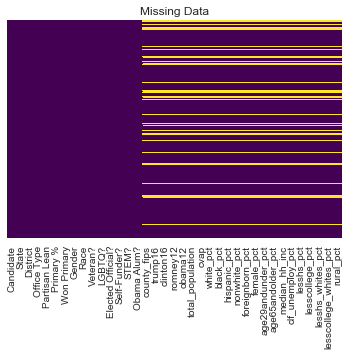

In [534]:
sns.heatmap(Dem_Midterm_Primary.isnull(), yticklabels=False,xticklabels=True, cbar=False, cmap='viridis')
plt.title('Missing Data')

In [535]:
Dem_Midterm_Primary[Dem_Midterm_Primary.isna().any(
    axis=1)]

Candidate State                        District  \
0    Anthony White (Alabama)    AL             Governor of Alabama   
1     Christopher Countryman    AL             Governor of Alabama   
2      Doug "New Blue" Smith    AL             Governor of Alabama   
3            James C. Fields    AL             Governor of Alabama   
4              Sue Bell Cobb    AL             Governor of Alabama   
5                Walt Maddox    AL             Governor of Alabama   
16           Jared Henderson    AR            Governor of Arkansas   
17           Leticia Sanders    AR            Governor of Arkansas   
26           Akinyemi Agbede    CA          Governor of California   
27    Albert Caesar Mezzetti    CA          Governor of California   
28           Amanda Renteria    CA          Governor of California   
29      Antonio Villaraigosa    CA          Governor of California   
30            Delaine Eastin    CA          Governor of California   
31              Gavin Newsom    CA          Governor of California   
32               John Chiang    CA          Governor of California   
33            Juan Bribiesca    CA          Governor of California   
34             Klement Tinaj    CA          Governor of California   
35     Michael Shellenberger    CA          Governor of California   
36   Robert Davidson Griffis    CA          Governor of California   
37    Thomas Jefferson Cares    CA          Governor of California   
94              Cary Kennedy    CO            Governor of Colorado   
95               Donna Lynne    CO            Governor of Colorado   
96               Jared Polis    CO            Governor of Colorado   
97          Michael Johnston    CO            Governor of Colorado   
108            Stacey Abrams    GA             Governor of Georgia   
109             Stacey Evans    GA             Governor of Georgia   
134             Andy McGuire    IA                Governor of Iowa   
135            Cathy Glasson    IA                Governor of Iowa   
136             Fred Hubbell    IA                Governor of Iowa   
137              John Norris    IA                Governor of Iowa   
..                       ...   ...                             ...   
527           Drew Edmondson    OK            Governor of Oklahoma   
528           Amanda Douglas    OK  U.S. House Oklahoma District 1   
529     David Matthew Hullum    OK  U.S. House Oklahoma District 1   
530         Gwendolyn Fields    OK  U.S. House Oklahoma District 1   
531              Mark Keeter    OK  U.S. House Oklahoma District 1   
532               Tim Gilpin    OK  U.S. House Oklahoma District 1   
599          James Smith Jr.    SC      Governor of South Carolina   
600        Marguerite Willis    SC      Governor of South Carolina   
601               Phil Noble    SC      Governor of South Carolina   
622            Billie Sutton    SD        Governor of South Dakota   
624           Craig Fitzhugh    TN           Governor of Tennessee   
625                Karl Dean    TN           Governor of Tennessee   
626      Mezianne Vale Payne    TN           Governor of Tennessee   
643               Gary Davis    TN           U.S. Senate Tennessee   
644               John Wolfe    TN           U.S. Senate Tennessee   
645            Phil Bredesen    TN           U.S. Senate Tennessee   
646          Adrian Ocegueda    TX               Governor of Texas   
647             Andrew White    TX               Governor of Texas   
648             Cedric Davis    TX               Governor of Texas   
649          Grady Yarbrough    TX               Governor of Texas   
650              James Clark    TX               Governor of Texas   
651            Jeffrey Payne    TX               Governor of Texas   
652              Joe Mumbach    TX               Governor of Texas   
653              Lupe Valdez    TX               Governor of Texas   
654            Thomas Wakely    TX               Governor of Texas   
751             Steven David 

Text(0.5, 1.0, 'Missing Data')

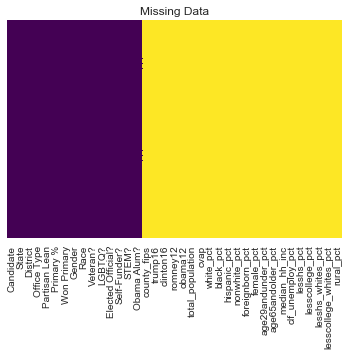

In [536]:
sns.heatmap(Dem_Midterm_Primary[Dem_Midterm_Primary.isna().any(
    axis=1)].isnull(), yticklabels=False, xticklabels=True, cbar=False, cmap='viridis')
plt.title('Missing Data')


In [537]:
statewide_races_demographics=pd.merge(
    Dem_Midterm_Primary_Final[Dem_Midterm_Primary_Final.isna().any(
    axis=1)], state_demo,on='State',how='left')

In [538]:
statewide_races_demographics=statewide_races_demographics.drop(columns=['trump16_x', 'clinton16_x', 'romney12_x', 'obama12_x',
       'total_population_x', 'cvap_x', 'white_pct_x', 'black_pct_x',
       'hispanic_pct_x', 'nonwhite_pct_x', 'foreignborn_pct_x', 'female_pct_x',
       'age29andunder_pct_x', 'age65andolder_pct_x', 'median_hh_inc_x',
       'clf_unemploy_pct_x', 'lesshs_pct_x', 'lesscollege_pct_x',
       'lesshs_whites_pct_x', 'lesscollege_whites_pct_x', 'rural_pct_x','county_fips'])

Text(0.5, 1.0, 'Missing Data')

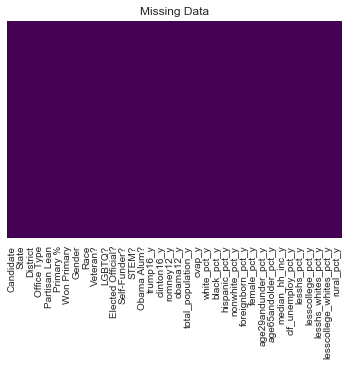

In [539]:
sns.heatmap(statewide_races_demographics.isnull(), yticklabels=False,xticklabels=True, cbar=False, cmap='viridis')
plt.title('Missing Data')

In [545]:
columns=[]
for i in statewide_races_demographics.columns:
    columns.append(i.replace('_y',''))
statewide_races_demographics.columns=columns

In [547]:
statewide_races_demographics.head(10)

Candidate State                District Office Type  \
0  Anthony White (Alabama)    AL     Governor of Alabama    Governor   
1   Christopher Countryman    AL     Governor of Alabama    Governor   
2    Doug "New Blue" Smith    AL     Governor of Alabama    Governor   
3          James C. Fields    AL     Governor of Alabama    Governor   
4            Sue Bell Cobb    AL     Governor of Alabama    Governor   
5              Walt Maddox    AL     Governor of Alabama    Governor   
6          Jared Henderson    AR    Governor of Arkansas    Governor   
7          Leticia Sanders    AR    Governor of Arkansas    Governor   
8          Akinyemi Agbede    CA  Governor of California    Governor   
9   Albert Caesar Mezzetti    CA  Governor of California    Governor   

   Partisan Lean  Primary % Won Primary  Gender      Race Veteran?  ...  \
0     -28.879999   3.420000          No    Male  Nonwhite      Yes  ...   
1     -28.879999   1.740000          No    Male     White       No  ...   
2     -28.879999   3.270000          No    Male     White      Yes  ...   
3     -28.879999   8.000000          No    Male  Nonwhite      Yes  ...   
4     -28.879999  28.980000          No  Female     White       No  ...   
5     -28.879999  54.599998         Yes    Male     White       No  ...   
6     -28.639999  63.299999         Yes    Male     White       No  ...   
7     -28.639999  36.700001          No  Female  Nonwhite       No  ...   
8      25.830000   0.220000          No    Male  Nonwhite       No  ...   
9      25.830000   0.280000          No    Male     White      Yes  ...   

  female_pct age29andunder_pct age65andolder_pct median_hh_inc  \
0  51.327904         37.978051         16.811869  39255.893333   
1  51.327904         37.978051         16.811869  39255.893333   
2  51.327904         37.978051         16.811869  39255.893333   
3  51.327904         37.978051         16.811869  39255.893333   
4  51.327904         37.978051         16.811869  39255.893333   
5  51.327904         37.978051         16.811869  39255.893333   
6  50.577838         37.290976         18.274512  37496.112500   
7  50.577838         37.290976         18.274512  37496.112500   
8  49.928737         40.189001         14.329789  61594.112903   
9  49.928737         40.189001         14.329789  61594.112903   

  clf_unemploy_pct  lesshs_pct  lesscollege_pct  lesshs_whites_pct  \
0         9.953542   18.840458        82.546164          15.126964   
1         9.953542   18.840458        82.546164          15.126964   
2         9.953542   18.840458        82.546164          15.126964   
3         9.953542   18.840458        82.546164          15.126964   
4         9.953542   18.840458        82.546164          15.126964   
5         9.953542   18.840458        82.546164          15.126964   
6         8.072568   17.461241        84.485854          15.032359   
7         8.072568   17.461241        84.485854          15.032359   
8         9.146370   17.425878        71.267332           6.359758   
9         9.146370   17.425878        71.267332           6.359758   

   lesscollege_whites_pct  rural_pct  
0               79.350384  65.063668  
1               79.350384  65.063668  
2               79.350384  65.063668  
3               79.350384  65.063668  
4               79.350384  65.063668  
5               79.350384  65.063668  
6               83.083980  64.612389  
7               83.083980  64.612389  
8               63.016986  16.332841  
9               63.016986  16.332841  

[10 rows x 36 columns]

In [522]:
statewide_races_demographics=statewide_races_demographics.set_index('District')

KeyError: 'District'

In [552]:
Dem_Midterm_Primary_Final.head(10)

Candidate State                       District  \
0  Anthony White (Alabama)    AL            Governor of Alabama   
1   Christopher Countryman    AL            Governor of Alabama   
2    Doug "New Blue" Smith    AL            Governor of Alabama   
3          James C. Fields    AL            Governor of Alabama   
4            Sue Bell Cobb    AL            Governor of Alabama   
5              Walt Maddox    AL            Governor of Alabama   
6  Lizzetta Hill McConnell    AL  U.S. House Alabama District 1   
7       Robert Kennedy Jr.    AL  U.S. House Alabama District 1   
8     Audri Scott Williams    AL  U.S. House Alabama District 2   
9            Tabitha Isner    AL  U.S. House Alabama District 2   

      Office Type  Partisan Lean  Primary % Won Primary  Gender      Race  \
0        Governor     -28.879999   3.420000          No    Male  Nonwhite   
1        Governor     -28.879999   1.740000          No    Male     White   
2        Governor     -28.879999   3.270000          No    Male     White   
3        Governor     -28.879999   8.000000          No    Male  Nonwhite   
4        Governor     -28.879999  28.980000          No  Female     White   
5        Governor     -28.879999  54.599998         Yes    Male     White   
6  Representative     -30.680000  19.230000          No  Female  Nonwhite   
7  Representative     -30.680000  80.769997         Yes    Male  Nonwhite   
8  Representative     -33.080002  39.560001          No  Female  Nonwhite   
9  Representative     -33.080002  60.439999         Yes  Female     White   

  Veteran?  ... female_pct age29andunder_pct age65andolder_pct median_hh_inc  \
0      Yes  ...        NaN               NaN               NaN           NaN   
1       No  ...        NaN               NaN               NaN           NaN   
2      Yes  ...        NaN               NaN               NaN           NaN   
3      Yes  ...        NaN               NaN               NaN           NaN   
4       No  ...        NaN               NaN               NaN           NaN   
5       No  ...        NaN               NaN               NaN           NaN   
6       No  ...  51.233432         37.559228         17.083995  38195.333333   
7      Yes  ...  51.233432         37.559228         17.083995  38195.333333   
8      Yes  ...  50.929505         38.372414         16.666009  39773.800000   
9       No  ...  50.929505         38.372414         16.666009  39773.800000   

  clf_unemploy_pct  lesshs_pct  lesscollege_pct  lesshs_whites_pct  \
0              NaN         NaN              NaN                NaN   
1              NaN         NaN              NaN                NaN   
2              NaN         NaN              NaN                NaN   
3              NaN         NaN              NaN                NaN   
4              NaN         NaN              NaN                NaN   
5              NaN         NaN              NaN                NaN   
6        14.212321   16.821231        83.693188          14.101545   
7        14.212321   16.821231        83.693188          14.101545   
8         9.871923   19.053105        82.115139          14.696447   
9         9.871923   19.053105        82.115139          14.696447   

   lesscollege_whites_pct  rural_pct  
0                     NaN        NaN  
1                     NaN        NaN  
2                     NaN        NaN  
3                     NaN        NaN  
4                     NaN        NaN  
5                     NaN        NaN  
6               80.603632  63.472636  
7               80.603632  63.472636  
8               78.455282  60.576053  
9               78.455282  60.576053  

[10 rows x 37 columns]

In [551]:
statewide_races_demographics.head(10)

Candidate State                District Office Type  \
0  Anthony White (Alabama)    AL     Governor of Alabama    Governor   
1   Christopher Countryman    AL     Governor of Alabama    Governor   
2    Doug "New Blue" Smith    AL     Governor of Alabama    Governor   
3          James C. Fields    AL     Governor of Alabama    Governor   
4            Sue Bell Cobb    AL     Governor of Alabama    Governor   
5              Walt Maddox    AL     Governor of Alabama    Governor   
6          Jared Henderson    AR    Governor of Arkansas    Governor   
7          Leticia Sanders    AR    Governor of Arkansas    Governor   
8          Akinyemi Agbede    CA  Governor of California    Governor   
9   Albert Caesar Mezzetti    CA  Governor of California    Governor   

   Partisan Lean  Primary % Won Primary  Gender      Race Veteran?  ...  \
0     -28.879999   3.420000          No    Male  Nonwhite      Yes  ...   
1     -28.879999   1.740000          No    Male     White       No  ...   
2     -28.879999   3.270000          No    Male     White      Yes  ...   
3     -28.879999   8.000000          No    Male  Nonwhite      Yes  ...   
4     -28.879999  28.980000          No  Female     White       No  ...   
5     -28.879999  54.599998         Yes    Male     White       No  ...   
6     -28.639999  63.299999         Yes    Male     White       No  ...   
7     -28.639999  36.700001          No  Female  Nonwhite       No  ...   
8      25.830000   0.220000          No    Male  Nonwhite       No  ...   
9      25.830000   0.280000          No    Male     White      Yes  ...   

  female_pct age29andunder_pct age65andolder_pct median_hh_inc  \
0  51.327904         37.978051         16.811869  39255.893333   
1  51.327904         37.978051         16.811869  39255.893333   
2  51.327904         37.978051         16.811869  39255.893333   
3  51.327904         37.978051         16.811869  39255.893333   
4  51.327904         37.978051         16.811869  39255.893333   
5  51.327904         37.978051         16.811869  39255.893333   
6  50.577838         37.290976         18.274512  37496.112500   
7  50.577838         37.290976         18.274512  37496.112500   
8  49.928737         40.189001         14.329789  61594.112903   
9  49.928737         40.189001         14.329789  61594.112903   

  clf_unemploy_pct  lesshs_pct  lesscollege_pct  lesshs_whites_pct  \
0         9.953542   18.840458        82.546164          15.126964   
1         9.953542   18.840458        82.546164          15.126964   
2         9.953542   18.840458        82.546164          15.126964   
3         9.953542   18.840458        82.546164          15.126964   
4         9.953542   18.840458        82.546164          15.126964   
5         9.953542   18.840458        82.546164          15.126964   
6         8.072568   17.461241        84.485854          15.032359   
7         8.072568   17.461241        84.485854          15.032359   
8         9.146370   17.425878        71.267332           6.359758   
9         9.146370   17.425878        71.267332           6.359758   

   lesscollege_whites_pct  rural_pct  
0               79.350384  65.063668  
1               79.350384  65.063668  
2               79.350384  65.063668  
3               79.350384  65.063668  
4               79.350384  65.063668  
5               79.350384  65.063668  
6               83.083980  64.612389  
7               83.083980  64.612389  
8               63.016986  16.332841  
9               63.016986  16.332841  

[10 rows x 36 columns]

In [555]:
Dem_Midterm_Primary.fillna(statewide_races_demographics,inplace=True)

In [558]:
Dem_Midterm_Primary[Dem_Midterm_Primary['Office Type']=='Governor']

Candidate State                    District Office Type  \
0    Anthony White (Alabama)    AL         Governor of Alabama    Governor   
1     Christopher Countryman    AL         Governor of Alabama    Governor   
2      Doug "New Blue" Smith    AL         Governor of Alabama    Governor   
3            James C. Fields    AL         Governor of Alabama    Governor   
4              Sue Bell Cobb    AL         Governor of Alabama    Governor   
5                Walt Maddox    AL         Governor of Alabama    Governor   
16           Jared Henderson    AR        Governor of Arkansas    Governor   
17           Leticia Sanders    AR        Governor of Arkansas    Governor   
26           Akinyemi Agbede    CA      Governor of California    Governor   
27    Albert Caesar Mezzetti    CA      Governor of California    Governor   
28           Amanda Renteria    CA      Governor of California    Governor   
29      Antonio Villaraigosa    CA      Governor of California    Governor   
30            Delaine Eastin    CA      Governor of California    Governor   
31              Gavin Newsom    CA      Governor of California    Governor   
32               John Chiang    CA      Governor of California    Governor   
33            Juan Bribiesca    CA      Governor of California    Governor   
34             Klement Tinaj    CA      Governor of California    Governor   
35     Michael Shellenberger    CA      Governor of California    Governor   
36   Robert Davidson Griffis    CA      Governor of California    Governor   
37    Thomas Jefferson Cares    CA      Governor of California    Governor   
94              Cary Kennedy    CO        Governor of Colorado    Governor   
95               Donna Lynne    CO        Governor of Colorado    Governor   
96               Jared Polis    CO        Governor of Colorado    Governor   
97          Michael Johnston    CO        Governor of Colorado    Governor   
108            Stacey Abrams    GA         Governor of Georgia    Governor   
109             Stacey Evans    GA         Governor of Georgia    Governor   
134             Andy McGuire    IA            Governor of Iowa    Governor   
135            Cathy Glasson    IA            Governor of Iowa    Governor   
136             Fred Hubbell    IA            Governor of Iowa    Governor   
137              John Norris    IA            Governor of Iowa    Governor   
..                       ...   ...                         ...         ...   
416            Asheesh Dewan    NV          Governor of Nevada    Governor   
417      Chris Giunchigliani    NV          Governor of Nevada    Governor   
418              David Jones    NV          Governor of Nevada    Governor   
419             Henry Thorns    NV          Governor of Nevada    Governor   
420         John Bonaventura    NV          Governor of Nevada    Governor   
421            Steve Sisolak    NV          Governor of Nevada    Governor   
485       Dennis J. Kucinich    OH            Governor of Ohio    Governor   
486         Joseph Schiavoni    OH            Governor of Ohio    Governor   
487               Larry Ealy    OH            Governor of Ohio    Governor   
488                 Paul Ray    OH            Governor of Ohio    Governor   
489          Richard Cordray    OH            Governor of Ohio    Governor   
490          William O'Neill    OH            Governor of Ohio    Governor   
526        Constance Johnson    OK        Governor of Oklahoma    Governor   
527           Drew Edmondson    OK        Governor of Oklahoma    Governor   
599          James Smith Jr.    SC  Governor of South Carolina    Governor   
600        Marguerite Willis    SC  Governor of South Carolina    Governor   
601               Phil Noble    SC  Governor of South Carolina    Governor   
622            Billie Sutton    SD    Governor of South Dakota    Governor   
624           Craig Fitzhugh    TN       Governor of Tennessee    Governor   
625                Karl Dean    TN       

In [559]:
statewide_races_demographics

Candidate State                        District  \
0    Anthony White (Alabama)    AL             Governor of Alabama   
1     Christopher Countryman    AL             Governor of Alabama   
2      Doug "New Blue" Smith    AL             Governor of Alabama   
3            James C. Fields    AL             Governor of Alabama   
4              Sue Bell Cobb    AL             Governor of Alabama   
5                Walt Maddox    AL             Governor of Alabama   
6            Jared Henderson    AR            Governor of Arkansas   
7            Leticia Sanders    AR            Governor of Arkansas   
8            Akinyemi Agbede    CA          Governor of California   
9     Albert Caesar Mezzetti    CA          Governor of California   
10           Amanda Renteria    CA          Governor of California   
11      Antonio Villaraigosa    CA          Governor of California   
12            Delaine Eastin    CA          Governor of California   
13              Gavin Newsom    CA          Governor of California   
14               John Chiang    CA          Governor of California   
15            Juan Bribiesca    CA          Governor of California   
16             Klement Tinaj    CA          Governor of California   
17     Michael Shellenberger    CA          Governor of California   
18   Robert Davidson Griffis    CA          Governor of California   
19    Thomas Jefferson Cares    CA          Governor of California   
20              Cary Kennedy    CO            Governor of Colorado   
21               Donna Lynne    CO            Governor of Colorado   
22               Jared Polis    CO            Governor of Colorado   
23          Michael Johnston    CO            Governor of Colorado   
24             Stacey Abrams    GA             Governor of Georgia   
25              Stacey Evans    GA             Governor of Georgia   
26              Andy McGuire    IA                Governor of Iowa   
27             Cathy Glasson    IA                Governor of Iowa   
28              Fred Hubbell    IA                Governor of Iowa   
29               John Norris    IA                Governor of Iowa   
..                       ...   ...                             ...   
100           Drew Edmondson    OK            Governor of Oklahoma   
101           Amanda Douglas    OK  U.S. House Oklahoma District 1   
102     David Matthew Hullum    OK  U.S. House Oklahoma District 1   
103         Gwendolyn Fields    OK  U.S. House Oklahoma District 1   
104              Mark Keeter    OK  U.S. House Oklahoma District 1   
105               Tim Gilpin    OK  U.S. House Oklahoma District 1   
106          James Smith Jr.    SC      Governor of South Carolina   
107        Marguerite Willis    SC      Governor of South Carolina   
108               Phil Noble    SC      Governor of South Carolina   
109            Billie Sutton    SD        Governor of South Dakota   
110           Craig Fitzhugh    TN           Governor of Tennessee   
111                Karl Dean    TN           Governor of Tennessee   
112      Mezianne Vale Payne    TN           Governor of Tennessee   
113               Gary Davis    TN           U.S. Senate Tennessee   
114               John Wolfe    TN           U.S. Senate Tennessee   
115            Phil Bredesen    TN           U.S. Senate Tennessee   
116          Adrian Ocegueda    TX               Governor of Texas   
117             Andrew White    TX               Governor of Texas   
118             Cedric Davis    TX               Governor of Texas   
119          Grady Yarbrough    TX               Governor of Texas   
120              James Clark    TX               Governor of Texas   
121            Jeffrey Payne    TX               Governor of Texas   
122              Joe Mumbach    TX               Governor of Texas   
123              Lupe Valdez    TX               Governor of Texas   
124            Thomas Wakely    TX               Governor of Texas   
125             Steven David 

In [528]:
pd.merge(Dem_Midterm_Primary_Final,statewide_races_demographics,on='District',how='outer')

Candidate State                             District  \
0    Anthony White (Alabama)    AL                  Governor of Alabama   
1     Christopher Countryman    AL                  Governor of Alabama   
2      Doug "New Blue" Smith    AL                  Governor of Alabama   
3            James C. Fields    AL                  Governor of Alabama   
4              Sue Bell Cobb    AL                  Governor of Alabama   
5                Walt Maddox    AL                  Governor of Alabama   
6    Lizzetta Hill McConnell    AL        U.S. House Alabama District 1   
7         Robert Kennedy Jr.    AL        U.S. House Alabama District 1   
8       Audri Scott Williams    AL        U.S. House Alabama District 2   
9              Tabitha Isner    AL        U.S. House Alabama District 2   
10    Adia McClellan Winfrey    AL        U.S. House Alabama District 3   
11             Mallory Hagan    AL        U.S. House Alabama District 3   
12                 Lee Auman    AL        U.S. House Alabama District 4   
13            Rick Neighbors    AL        U.S. House Alabama District 4   
14            Peter Joffrion    AL        U.S. House Alabama District 5   
15              Danner Kline    AL        U.S. House Alabama District 6   
16           Jared Henderson    AR                 Governor of Arkansas   
17           Leticia Sanders    AR                 Governor of Arkansas   
18             Chintan Desai    AR       U.S. House Arkansas District 1   
19             Clarke Tucker    AR       U.S. House Arkansas District 2   
20                Gwen Combs    AR       U.S. House Arkansas District 2   
21          Jonathan Dunkley    AR       U.S. House Arkansas District 2   
22              Paul Spencer    AR       U.S. House Arkansas District 2   
23             Joshua Mahony    AR       U.S. House Arkansas District 3   
24             Hayden Shamel    AR       U.S. House Arkansas District 4   
25           Hiral Tipirneni    AZ        U.S. House Arizona District 8   
26           Akinyemi Agbede    CA               Governor of California   
27    Albert Caesar Mezzetti    CA               Governor of California   
28           Amanda Renteria    CA               Governor of California   
29      Antonio Villaraigosa    CA               Governor of California   
..                       ...   ...                                  ...   
770             Elaine Luria    VA       U.S. House Virginia District 2   
771            Karen Mallard    VA       U.S. House Virginia District 2   
772          Leslie Cockburn    VA       U.S. House Virginia District 5   
773          Charlotte Moore    VA       U.S. House Virginia District 6   
774           Jennifer Lewis    VA       U.S. House Virginia District 6   
775            Peter Volosin    VA       U.S. House Virginia District 6   
776           Sergio Coppola    VA       U.S. House Virginia District 6   
777       Abigail Spanberger    VA       U.S. House Virginia District 7   
778                 Dan Ward    VA       U.S. House Virginia District 7   
779      Anthony Flaccavento    VA       U.S. House Virginia District 9   
780       Justin Santopietro    VA       U.S. House Virginia District 9   
781             Carolyn Long    WA     U.S. House Washington District 3   
782           David McDevitt    WA     U.S. House Washington District 3   
783           Dorothy Gasque    WA     U.S. House Washington District 3   
784              Martin Hash    WA     U.S. House Washington District 3   
785          Christine Brown    WA     U.S. House Washington District 4   
786               Lisa Brown    WA     U.S. House Washington District 5   
787        Jason Rittereiser    WA     U.S. House Washington District 8   
788              Kim Schrier    WA     U.S. House Washington District 8   
789            Shannon Hader    WA     U.S. House Washington District 8   
790            Thomas Cramer    WA     U.S. House Washington District 8   
791           Kendra Fershee    WV  U.S. Hou

In [3]:
df.loc[:,'BILL_AMT1':'PAY_AMT1'].sort_values(by='BILL_AMT1',ascending=True)

BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
12330    -165580     324392     296931      30355      26771      23737   
23003    -154973      59514     220765     180488     173140     170233   
8835      -15308     -33350      95740      77875      62675      48764   
351       -14386     -13543       3432      -3684          0       1386   
29779     -11545      -1935       7321       2850       6340       3110   
27465     -10682      50928      54711      55926      18030      18367   
4635       -9802         99        103        249        386      11504   
4439       -9095     -30000     -10608       2657       4245       3392   
17204      -8187     -17810       -595       7462       9390       5183   
3105       -7438     144562     147437     135043     137980     138908   
25894      -7082      12270      29787      32040       7773      12681   
21325      -6676       5953       2870        390       1210       2551   
29491      -6029      -9119     -46127     -50616     -53007     -94625   
15553      -6028      10177      10229       7899       4553       4252   
8493       -6027      -6027       3973       3973       1244       1631   
28450      -5700      -5700      -5700     197300      -2300     227835   
28277      -5684     211466     200304       2735        316        305   
22116      -5478      -8584     -14998      10980       1123       4665   
22402      -4894      -4894      -4894      -4894      -4894      -4894   
4808       -4370      82387      83701      85035      86482      88164   
23860      -4316      60054     187734      17328      10658      77898   
6840       -4300      -4300      -4620      -4620      -5820      -5820   
6150       -3928      -5973       4735       6186        116      14429   
12273      -3768      -3938      -5738      -5738      -5738      -5738   
21962      -3706      -6108      32662      59350      41136      28596   
19785      -3549      -8964     157499     160946      50228      53525   
3396       -3309     177952     167125     139784     142662     145725   
19830      -3258       7244       3498      10494       6996       3498   
21378      -3182      -3885       1474        555       1096       1349   
10749      -2900      -2900      -2900      -2900      -2900      -2900   
...          ...        ...        ...        ...        ...        ...   
11855     520453     520643     517746     428655     352793     350036   
26086     520651     383123     391741     400196     408503     156881   
11507     523618     483244     459273     386722     366421     241182   
23893     524191     524555     445543     443199     451040     431316   
4323      533142     504834     413844     305875      46420      14540   
20892     539092     552234     565550     572805     823540     501370   
27518     542827     508581     471796     468202     442401     419209   
22373     546485     228070     184810     131304     110930      84193   
2249      546741     535509     548020     530672     155083     165975   
23377     548551     546741     535509     548020     530672     155083   
25817     562326     532374     537543     541019     468571     478034   
22850     563892     569577     577957     563543     451401     108890   
10768     564757     572834     430774     437950     447203     456453   
21381     568532     577681     577015     565669     524315     476846   
10960     569023     562316     475333     473182     481896     513798   
8229      580928     597793     597415     569034     551702     568638   
29041     581319     552144     523423     493548     429966     427216   
5924      581775     572677     384060     304508     247178     228349   
23758     588000     277559     288835     281810     273700     269552   
28624     589654     581775     572677     384060     304508     247178   
10780     604019     605943     439854     404157     370686     294348   
26227     608594     624475     

In [43]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [4]:
# create a dictionary mapping columns to rename and what to rename them to
rename_columns = {'LIMIT_BAL':'CREDIT_BAL', 'SEX':'GENDER', 'MARRIAGE':'MARTIAL_STATUS', 'PAY_0':'PAY_SEPT', 'PAY_2':'PAY_AUG', 'PAY_3':'PAY_JULY', 'PAY_4':'PAY_JUN', 'PAY_5':'PAY_MAY', 'PAY_6':'PAY_APR', 'BILL_AMT1':'BILL_AMT_SEPT', 'BILL_AMT2':'BILL_AMT_AUG',
       'BILL_AMT3':'BILL_AMT_JULY', 'BILL_AMT4':'BILL_AMT_JUN', 'BILL_AMT5':'BILL_AMT_MAY', 'BILL_AMT6':'BILL_AMT_APR', 'PAY_AMT1':'PAY_AMT_SEPT',
       'PAY_AMT2':'PAY_AMT_AUG', 'PAY_AMT3':'PAY_AMT_JULY', 'PAY_AMT4':'PAY_AMT_JUN', 'PAY_AMT5':'PAY_AMT_MAY', 'PAY_AMT6':'PAY_AMT_APR', 'default payment next month':'DEFAULT_PAY_NEXT_MONTH'}

# rename columns
df.rename(rename_columns, axis=1, inplace=True)

In [93]:
df.head()

ID  CREDIT_BAL  GENDER  EDUCATION  MARTIAL_STATUS  AGE  PAY_SEPT  PAY_AUG  \
0   1       20000       2          2               1   24         2        2   
1   2      120000       2          2               2   26        -1        2   
2   3       90000       2          2               2   34         0        0   
3   4       50000       2          2               1   37         0        0   
4   5       50000       1          2               1   57        -1        0   

   PAY_JULY  PAY_JUN  ...  BILL_AMT_JUN  BILL_AMT_MAY  BILL_AMT_APR  \
0        -1       -1  ...             0             0             0   
1         0        0  ...          3272          3455          3261   
2         0        0  ...         14331         14948         15549   
3         0        0  ...         28314         28959         29547   
4        -1        0  ...         20940         19146         19131   

   PAY_AMT_SEPT  PAY_AMT_AUG  PAY_AMT_JULY  PAY_AMT_JUN  PAY_AMT_MAY  \
0             0          689             0            0            0   
1             0         1000          1000         1000            0   
2          1518         1500          1000         1000         1000   
3          2000         2019          1200         1100         1069   
4          2000        36681         10000         9000          689   

   PAY_AMT_APR  DEFAULT_PAY_NEXT_MONTH  
0            0                       1  
1         2000                       1  
2         5000                       0  
3         1000                       0  
4          679                       0  

[5 rows x 25 columns]

In [5]:
# set index as ID - ID for each client
df.set_index('ID', inplace=True, drop=True)

In [47]:
df.head()

CREDIT_BAL  GENDER  EDUCATION  MARTIAL_STATUS  AGE  PAY_SEPT  PAY_AUG  \
ID                                                                          
1        20000       2          2               1   24         2        2   
2       120000       2          2               2   26        -1        2   
3        90000       2          2               2   34         0        0   
4        50000       2          2               1   37         0        0   
5        50000       1          2               1   57        -1        0   

    PAY_JULY  PAY_JUN  PAY_MAY  ...  BILL_AMT_JUN  BILL_AMT_MAY  BILL_AMT_APR  \
ID                              ...                                             
1         -1       -1       -2  ...             0             0             0   
2          0        0        0  ...          3272          3455          3261   
3          0        0        0  ...         14331         14948         15549   
4          0        0        0  ...         28314         28959         29547   
5         -1        0        0  ...         20940         19146         19131   

    PAY_AMT_SEPT  PAY_AMT_AUG  PAY_AMT_JULY  PAY_AMT_JUN  PAY_AMT_MAY  \
ID                                                                      
1              0          689             0            0            0   
2              0         1000          1000         1000            0   
3           1518         1500          1000         1000         1000   
4           2000         2019          1200         1100         1069   
5           2000        36681         10000         9000          689   

    PAY_AMT_APR  DEFAULT_PAY_NEXT_MONTH  
ID                                       
1             0                       1  
2          2000                       1  
3          5000                       0  
4          1000                       0  
5           679                       0  

[5 rows x 24 columns]

In [48]:
df.columns

Index(['CREDIT_BAL', 'GENDER', 'EDUCATION', 'MARTIAL_STATUS', 'AGE',
       'PAY_SEPT', 'PAY_AUG', 'PAY_JULY', 'PAY_JUN', 'PAY_MAY', 'PAY_APR',
       'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JULY', 'BILL_AMT_JUN',
       'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG',
       'PAY_AMT_JULY', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR',
       'DEFAULT_PAY_NEXT_MONTH'],
      dtype='object')

In [6]:
# new dataframe without bill amounts below 0
df_cleaned = df[(df.BILL_AMT_SEPT > 0) & (df.BILL_AMT_AUG > 0) & (df.BILL_AMT_JULY > 0) & (df.BILL_AMT_JUN > 0) & (df.BILL_AMT_MAY > 0) & (df.BILL_AMT_APR > 0)].copy()

In [50]:
df_cleaned.describe()

CREDIT_BAL        GENDER     EDUCATION  MARTIAL_STATUS  \
count    22384.000000  22384.000000  22384.000000    22384.000000   
mean    161464.424589      1.595872      1.880808        1.557541   
std     130308.468208      0.490733      0.770032        0.521781   
min      10000.000000      1.000000      0.000000        0.000000   
25%      50000.000000      1.000000      1.000000        1.000000   
50%     130000.000000      2.000000      2.000000        2.000000   
75%     230000.000000      2.000000      2.000000        2.000000   
max    1000000.000000      2.000000      6.000000        3.000000   

                AGE      PAY_SEPT       PAY_AUG      PAY_JULY       PAY_JUN  \
count  22384.000000  22384.000000  22384.000000  22384.000000  22384.000000   
mean      35.364948      0.105835      0.140234      0.123436      0.091762   
std        9.272091      1.071001      1.102867      1.085538      1.056284   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000      0.000000      0.000000      0.000000      0.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

            PAY_MAY  ...   BILL_AMT_JUN   BILL_AMT_MAY   BILL_AMT_APR  \
count  22384.000000  ...   22384.000000   22384.000000   22384.000000   
mean       0.056246  ...   55420.361240   51842.206219   50318.729137   
std        1.014971  ...   68922.264723   65039.019030   63609.025797   
min       -2.000000  ...       2.000000       2.000000       2.000000   
25%        0.000000  ...   11447.250000   10282.250000    9702.500000   
50%        0.000000  ...   29341.000000   28014.000000   27244.500000   
75%        0.000000  ...   73408.500000   68582.750000   66682.750000   
max        8.000000  ...  891586.000000  927171.000000  961664.000000   

        PAY_AMT_SEPT   PAY_AMT_AUG   PAY_AMT_JULY    PAY_AMT_JUN  \
count   22384.000000  2.238400e+04   22384.000000   22384.000000   
mean     6411.220470  6.500290e+03    5827.614412    5329.715422   
std     17360.204606  2.094958e+04   18067.998211   15258.669574   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%      1500.000000  1.470750e+03    1022.000000     900.000000   
50%      2943.000000  2.700000e+03    2190.000000    2000.000000   
75%      6000.000000  5.700000e+03    5001.000000    5000.000000   
max    873552.000000  1.227082e+06  896040.000000  621000.000000   

         PAY_AMT_MAY    PAY_AMT_APR  DEFAULT_PAY_NEXT_MONTH  
count   22384.000000   22384.000000            22384.000000  
mean     5421.859677    5655.613608                0.226322  
std     15262.328174   17332.971650                0.418460  
min         0.000000       0.000000                0.000000  
25%       981.750000     800.000000                0.000000  
50%      2000.000000    2000.000000                0.000000  
75%      5000.000000    5000.000000                0.000000  
max    426529.000000  527143.000000                1.000000  

[8 rows x 24 columns]

In [81]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22384 entries, 2 to 30000
Data columns (total 24 columns):
CREDIT_BAL                22384 non-null int64
GENDER                    22384 non-null int64
EDUCATION                 22384 non-null int64
MARTIAL_STATUS            22384 non-null int64
AGE                       22384 non-null int64
PAY_SEPT                  22384 non-null int64
PAY_AUG                   22384 non-null int64
PAY_JULY                  22384 non-null int64
PAY_JUN                   22384 non-null int64
PAY_MAY                   22384 non-null int64
PAY_APR                   22384 non-null int64
BILL_AMT_SEPT             22384 non-null int64
BILL_AMT_AUG              22384 non-null int64
BILL_AMT_JULY             22384 non-null int64
BILL_AMT_JUN              22384 non-null int64
BILL_AMT_MAY              22384 non-null int64
BILL_AMT_APR              22384 non-null int64
PAY_AMT_SEPT              22384 non-null int64
PAY_AMT_AUG               22384 non-null int6

In [7]:
# replace 6 under Education with 4 - categorize all Education > 4 as 4 = others
df_cleaned.EDUCATION = df_cleaned.EDUCATION.replace(6, 4)

In [97]:
df_cleaned.describe()

CREDIT_BAL        GENDER     EDUCATION  MARTIAL_STATUS  \
count    22384.000000  22384.000000  22384.000000    22384.000000   
mean    161464.424589      1.595872      1.878038        1.557541   
std     130308.468208      0.490733      0.758724        0.521781   
min      10000.000000      1.000000      0.000000        0.000000   
25%      50000.000000      1.000000      1.000000        1.000000   
50%     130000.000000      2.000000      2.000000        2.000000   
75%     230000.000000      2.000000      2.000000        2.000000   
max    1000000.000000      2.000000      5.000000        3.000000   

                AGE      PAY_SEPT       PAY_AUG      PAY_JULY       PAY_JUN  \
count  22384.000000  22384.000000  22384.000000  22384.000000  22384.000000   
mean      35.364948      0.105835      0.140234      0.123436      0.091762   
std        9.272091      1.071001      1.102867      1.085538      1.056284   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000      0.000000      0.000000      0.000000      0.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

            PAY_MAY  ...   BILL_AMT_JUN   BILL_AMT_MAY   BILL_AMT_APR  \
count  22384.000000  ...   22384.000000   22384.000000   22384.000000   
mean       0.056246  ...   55420.361240   51842.206219   50318.729137   
std        1.014971  ...   68922.264723   65039.019030   63609.025797   
min       -2.000000  ...       2.000000       2.000000       2.000000   
25%        0.000000  ...   11447.250000   10282.250000    9702.500000   
50%        0.000000  ...   29341.000000   28014.000000   27244.500000   
75%        0.000000  ...   73408.500000   68582.750000   66682.750000   
max        8.000000  ...  891586.000000  927171.000000  961664.000000   

        PAY_AMT_SEPT   PAY_AMT_AUG   PAY_AMT_JULY    PAY_AMT_JUN  \
count   22384.000000  2.238400e+04   22384.000000   22384.000000   
mean     6411.220470  6.500290e+03    5827.614412    5329.715422   
std     17360.204606  2.094958e+04   18067.998211   15258.669574   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%      1500.000000  1.470750e+03    1022.000000     900.000000   
50%      2943.000000  2.700000e+03    2190.000000    2000.000000   
75%      6000.000000  5.700000e+03    5001.000000    5000.000000   
max    873552.000000  1.227082e+06  896040.000000  621000.000000   

         PAY_AMT_MAY    PAY_AMT_APR  DEFAULT_PAY_NEXT_MONTH  
count   22384.000000   22384.000000            22384.000000  
mean     5421.859677    5655.613608                0.226322  
std     15262.328174   17332.971650                0.418460  
min         0.000000       0.000000                0.000000  
25%       981.750000     800.000000                0.000000  
50%      2000.000000    2000.000000                0.000000  
75%      5000.000000    5000.000000                0.000000  
max    426529.000000  527143.000000                1.000000  

[8 rows x 24 columns]

In [8]:
# replace 5 under Education with 4 - categorize all Education > 4 as 4=others
df_cleaned.EDUCATION = df_cleaned.EDUCATION.replace(5, 4)

In [99]:
df_cleaned.describe()

CREDIT_BAL        GENDER    EDUCATION  MARTIAL_STATUS  \
count    22384.000000  22384.000000  22384.00000    22384.000000   
mean    161464.424589      1.595872      1.86955        1.557541   
std     130308.468208      0.490733      0.72875        0.521781   
min      10000.000000      1.000000      0.00000        0.000000   
25%      50000.000000      1.000000      1.00000        1.000000   
50%     130000.000000      2.000000      2.00000        2.000000   
75%     230000.000000      2.000000      2.00000        2.000000   
max    1000000.000000      2.000000      4.00000        3.000000   

                AGE      PAY_SEPT       PAY_AUG      PAY_JULY       PAY_JUN  \
count  22384.000000  22384.000000  22384.000000  22384.000000  22384.000000   
mean      35.364948      0.105835      0.140234      0.123436      0.091762   
std        9.272091      1.071001      1.102867      1.085538      1.056284   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000      0.000000      0.000000      0.000000      0.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

            PAY_MAY  ...   BILL_AMT_JUN   BILL_AMT_MAY   BILL_AMT_APR  \
count  22384.000000  ...   22384.000000   22384.000000   22384.000000   
mean       0.056246  ...   55420.361240   51842.206219   50318.729137   
std        1.014971  ...   68922.264723   65039.019030   63609.025797   
min       -2.000000  ...       2.000000       2.000000       2.000000   
25%        0.000000  ...   11447.250000   10282.250000    9702.500000   
50%        0.000000  ...   29341.000000   28014.000000   27244.500000   
75%        0.000000  ...   73408.500000   68582.750000   66682.750000   
max        8.000000  ...  891586.000000  927171.000000  961664.000000   

        PAY_AMT_SEPT   PAY_AMT_AUG   PAY_AMT_JULY    PAY_AMT_JUN  \
count   22384.000000  2.238400e+04   22384.000000   22384.000000   
mean     6411.220470  6.500290e+03    5827.614412    5329.715422   
std     17360.204606  2.094958e+04   18067.998211   15258.669574   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%      1500.000000  1.470750e+03    1022.000000     900.000000   
50%      2943.000000  2.700000e+03    2190.000000    2000.000000   
75%      6000.000000  5.700000e+03    5001.000000    5000.000000   
max    873552.000000  1.227082e+06  896040.000000  621000.000000   

         PAY_AMT_MAY    PAY_AMT_APR  DEFAULT_PAY_NEXT_MONTH  
count   22384.000000   22384.000000            22384.000000  
mean     5421.859677    5655.613608                0.226322  
std     15262.328174   17332.971650                0.418460  
min         0.000000       0.000000                0.000000  
25%       981.750000     800.000000                0.000000  
50%      2000.000000    2000.000000                0.000000  
75%      5000.000000    5000.000000                0.000000  
max    426529.000000  527143.000000                1.000000  

[8 rows x 24 columns]

In [9]:
# remove those that have Education = 0
df_cleaned = df_cleaned[df_cleaned.EDUCATION != 0]

In [102]:
df_cleaned.describe()

CREDIT_BAL        GENDER     EDUCATION  MARTIAL_STATUS  \
count    22376.000000  22376.000000  22376.000000    22376.000000   
mean    161445.731141      1.595906      1.870218        1.557472   
std     130315.289283      0.490727      0.728022        0.521797   
min      10000.000000      1.000000      1.000000        0.000000   
25%      50000.000000      1.000000      1.000000        1.000000   
50%     130000.000000      2.000000      2.000000        2.000000   
75%     230000.000000      2.000000      2.000000        2.000000   
max    1000000.000000      2.000000      4.000000        3.000000   

                AGE      PAY_SEPT       PAY_AUG      PAY_JULY       PAY_JUN  \
count  22376.000000  22376.000000  22376.000000  22376.000000  22376.000000   
mean      35.363291      0.106141      0.140552      0.123659      0.091929   
std        9.271801      1.070997      1.102865      1.085462      1.056227   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000      0.000000      0.000000      0.000000      0.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

            PAY_MAY  ...   BILL_AMT_JUN   BILL_AMT_MAY   BILL_AMT_APR  \
count  22376.000000  ...   22376.000000   22376.000000   22376.000000   
mean       0.056534  ...   55434.277753   51856.217912   50333.553897   
std        1.014960  ...   68929.999122   65045.797134   63615.110379   
min       -2.000000  ...       2.000000       2.000000       2.000000   
25%        0.000000  ...   11449.000000   10288.750000    9709.500000   
50%        0.000000  ...   29349.000000   28018.500000   27266.000000   
75%        0.000000  ...   73471.500000   68591.250000   66696.250000   
max        8.000000  ...  891586.000000  927171.000000  961664.000000   

        PAY_AMT_SEPT   PAY_AMT_AUG   PAY_AMT_JULY    PAY_AMT_JUN  \
count   22376.000000  2.237600e+04   22376.000000   22376.000000   
mean     6410.674383  6.498756e+03    5826.654451    5329.485878   
std     17362.697428  2.094995e+04   18070.284758   15260.747624   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%      1500.000000  1.470750e+03    1022.000000     900.000000   
50%      2942.000000  2.700000e+03    2190.000000    2000.000000   
75%      6000.000000  5.700000e+03    5001.000000    5000.000000   
max    873552.000000  1.227082e+06  896040.000000  621000.000000   

         PAY_AMT_MAY    PAY_AMT_APR  DEFAULT_PAY_NEXT_MONTH  
count   22376.000000   22376.000000            22376.000000  
mean     5422.341482    5655.888631                0.226403  
std     15264.987300   17335.846370                0.418512  
min         0.000000       0.000000                0.000000  
25%       981.000000     800.000000                0.000000  
50%      2000.000000    2000.000000                0.000000  
75%      5000.000000    5000.000000                0.000000  
max    426529.000000  527143.000000                1.000000  

[8 rows x 24 columns]

In [10]:
# remove those that have Marriage = 0
df_cleaned = df_cleaned[df_cleaned.MARTIAL_STATUS != 0]

In [104]:
df_cleaned.describe()

CREDIT_BAL        GENDER     EDUCATION  MARTIAL_STATUS  \
count    22341.000000  22341.000000  22341.000000    22341.000000   
mean    161506.185041      1.595676      1.868806        1.559912   
std     130376.427315      0.490772      0.727404        0.518548   
min      10000.000000      1.000000      1.000000        1.000000   
25%      50000.000000      1.000000      1.000000        1.000000   
50%     130000.000000      2.000000      2.000000        2.000000   
75%     230000.000000      2.000000      2.000000        2.000000   
max    1000000.000000      2.000000      4.000000        3.000000   

                AGE      PAY_SEPT       PAY_AUG      PAY_JULY       PAY_JUN  \
count  22341.000000  22341.000000  22341.000000  22341.000000  22341.000000   
mean      35.361756      0.106262      0.140504      0.123495      0.091939   
std        9.271910      1.070516      1.102369      1.084898      1.056022   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000      0.000000      0.000000      0.000000      0.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

            PAY_MAY  ...   BILL_AMT_JUN   BILL_AMT_MAY   BILL_AMT_APR  \
count  22341.000000  ...   22341.000000   22341.000000   22341.000000   
mean       0.056488  ...   55478.587440   51896.897766   50372.367307   
std        1.014812  ...   68967.946686   65080.680758   63649.706643   
min       -2.000000  ...       2.000000       2.000000       2.000000   
25%        0.000000  ...   11455.000000   10302.000000    9727.000000   
50%        0.000000  ...   29361.000000   28029.000000   27279.000000   
75%        0.000000  ...   73609.000000   68703.000000   66756.000000   
max        8.000000  ...  891586.000000  927171.000000  961664.000000   

        PAY_AMT_SEPT   PAY_AMT_AUG   PAY_AMT_JULY    PAY_AMT_JUN  \
count   22341.000000  2.234100e+04   22341.000000   22341.000000   
mean     6408.052683  6.503406e+03    5828.352715    5332.848530   
std     17354.373245  2.096478e+04   18080.782219   15270.145333   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%      1500.000000  1.473000e+03    1022.000000     900.000000   
50%      2949.000000  2.700000e+03    2191.000000    2000.000000   
75%      6000.000000  5.700000e+03    5001.000000    5000.000000   
max    873552.000000  1.227082e+06  896040.000000  621000.000000   

         PAY_AMT_MAY    PAY_AMT_APR  DEFAULT_PAY_NEXT_MONTH  
count   22341.000000   22341.000000            22341.000000  
mean     5426.175865    5659.471644                0.226579  
std     15275.448786   17347.118736                0.418627  
min         0.000000       0.000000                0.000000  
25%       981.000000     800.000000                0.000000  
50%      2000.000000    2000.000000                0.000000  
75%      5000.000000    5000.000000                0.000000  
max    426529.000000  527143.000000                1.000000  

[8 rows x 24 columns]

In [11]:
# categorize all pay columns < -1 to -1
df_cleaned.loc[:, 'PAY_SEPT':'PAY_APR'] = df_cleaned.loc[:, 'PAY_SEPT':'PAY_APR'].apply(lambda x: x.replace(-2, -1))

In [110]:
df_cleaned.describe()

CREDIT_BAL        GENDER     EDUCATION  MARTIAL_STATUS  \
count    22341.000000  22341.000000  22341.000000    22341.000000   
mean    161506.185041      1.595676      1.868806        1.559912   
std     130376.427315      0.490772      0.727404        0.518548   
min      10000.000000      1.000000      1.000000        1.000000   
25%      50000.000000      1.000000      1.000000        1.000000   
50%     130000.000000      2.000000      2.000000        2.000000   
75%     230000.000000      2.000000      2.000000        2.000000   
max    1000000.000000      2.000000      4.000000        3.000000   

                AGE      PAY_SEPT       PAY_AUG      PAY_JULY       PAY_JUN  \
count  22341.000000  22341.000000  22341.000000  22341.000000  22341.000000   
mean      35.361756      0.153619      0.184101      0.165212      0.132850   
std        9.271910      0.995801      1.034538      1.019707      0.991587   
min       21.000000     -1.000000     -1.000000     -1.000000     -1.000000   
25%       28.000000      0.000000      0.000000      0.000000      0.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

            PAY_MAY  ...   BILL_AMT_JUN   BILL_AMT_MAY   BILL_AMT_APR  \
count  22341.000000  ...   22341.000000   22341.000000   22341.000000   
mean       0.097131  ...   55478.587440   51896.897766   50372.367307   
std        0.949561  ...   68967.946686   65080.680758   63649.706643   
min       -1.000000  ...       2.000000       2.000000       2.000000   
25%        0.000000  ...   11455.000000   10302.000000    9727.000000   
50%        0.000000  ...   29361.000000   28029.000000   27279.000000   
75%        0.000000  ...   73609.000000   68703.000000   66756.000000   
max        8.000000  ...  891586.000000  927171.000000  961664.000000   

        PAY_AMT_SEPT   PAY_AMT_AUG   PAY_AMT_JULY    PAY_AMT_JUN  \
count   22341.000000  2.234100e+04   22341.000000   22341.000000   
mean     6408.052683  6.503406e+03    5828.352715    5332.848530   
std     17354.373245  2.096478e+04   18080.782219   15270.145333   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%      1500.000000  1.473000e+03    1022.000000     900.000000   
50%      2949.000000  2.700000e+03    2191.000000    2000.000000   
75%      6000.000000  5.700000e+03    5001.000000    5000.000000   
max    873552.000000  1.227082e+06  896040.000000  621000.000000   

         PAY_AMT_MAY    PAY_AMT_APR  DEFAULT_PAY_NEXT_MONTH  
count   22341.000000   22341.000000            22341.000000  
mean     5426.175865    5659.471644                0.226579  
std     15275.448786   17347.118736                0.418627  
min         0.000000       0.000000                0.000000  
25%       981.000000     800.000000                0.000000  
50%      2000.000000    2000.000000                0.000000  
75%      5000.000000    5000.000000                0.000000  
max    426529.000000  527143.000000                1.000000  

[8 rows x 24 columns]

Text(0.5, 1.0, 'Missing Data')

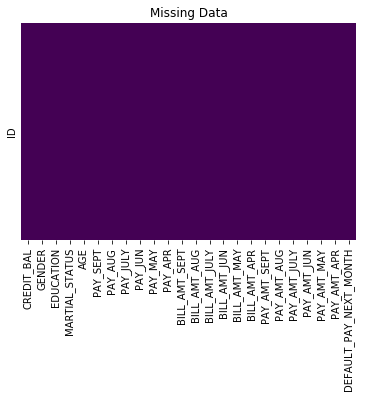

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing Data')

In [11]:
from scipy import stats
df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

CREDIT_BAL  GENDER  EDUCATION  MARTIAL_STATUS  AGE  PAY_SEPT  PAY_AUG  \
ID                                                                             
1           20000       2          2               1   24         2        2   
2          120000       2          2               2   26        -1        2   
3           90000       2          2               2   34         0        0   
4           50000       2          2               1   37         0        0   
5           50000       1          2               1   57        -1        0   
6           50000       1          1               2   37         0        0   
8          100000       2          2               2   23         0       -1   
9          140000       2          3               1   28         0        0   
10          20000       1          3               2   35        -2       -2   
11         200000       2          3               2   34         0        0   
12         260000       2          1               2   51        -1       -1   
14          70000       1          2               2   30         1        2   
15         250000       1          1               2   29         0        0   
16          50000       2          3               3   23         1        2   
17          20000       1          1               2   24         0        0   
19         360000       2          1               1   49         1       -2   
20         180000       2          1               2   29         1       -2   
21         130000       2          3               2   39         0        0   
22         120000       2          2               1   39        -1       -1   
23          70000       2          2               2   26         2        0   
24         450000       2          1               1   40        -2       -2   
25          90000       1          1               2   23         0        0   
26          50000       1          3               2   23         0        0   
27          60000       1          1               2   27         1       -2   
28          50000       2          3               2   30         0        0   
29          50000       2          3               1   47        -1       -1   
30          50000       1          1               2   26         0        0   
31         230000       2          1               2   27        -1       -1   
32          50000       1          2               2   33         2        0   
33         100000       1          1               2   32         0        0   
...           ...     ...        ...             ...  ...       ...      ...   
29963       50000       1          2               2   30         1       -1   
29965      360000       1          1               2   31        -1       -1   
29966      140000       1          2               1   32         0        0   
29968       50000       1          2               1   32         0        0   
29969       20000       1          2               2   34         0        0   
29970      200000       1          2               1   33         0        0   
29971      360000       1          1               1   34        -1       -1   
29972       80000       1          3               1   36         0        0   
29974      230000       1          2               1   35         1       -2   
29975       50000       1          2               1   37         1        2   
29976      220000       1          2               1   41         0        0   
29977       40000       1          2               2   47         2        2   
29978      420000       1          1               2   34         0        0   
29979      310000       1          2               1   39         0        0   
29980      180000       1          1               1   32        -2       -2   
29981       50000       1          3               2   42         0        0   
29982       50000       1          2               1   44         1        2   
29983  

In [282]:
df.sort_values(by='CREDIT_BAL',ascending=False)

CREDIT_BAL  GENDER  EDUCATION  MARTIAL_STATUS  AGE  PAY_SEPT  PAY_AUG  \
ID                                                                             
2198      1000000       2          1               1   47         0        0   
14920      800000       1          2               1   53        -1       -1   
18007      800000       1          1               2   46        -2       -2   
24321      780000       1          1               1   48         0        0   
28716      780000       2          2               2   41        -2       -2   
21376      760000       1          3               1   54         0        0   
13187      750000       2          1               2   28         1       -1   
3734       750000       2          2               1   43        -1       -1   
10090      750000       2          1               1   41         0        0   
4604       750000       2          3               1   40        -2       -2   
25127      740000       1          1               1   50         0        0   
13884      740000       2          2               1   35         2       -1   
24687      730000       1          2               1   37         0        0   
27558      730000       1          3               1   56         0        0   
26922      720000       1          1               1   40         0        0   
10648      720000       2          1               1   45         0        0   
26113      720000       2          2               2   38         1       -2   
3690       710000       1          2               1   51         1       -2   
23092      710000       2          4               2   32         0        0   
5879       710000       1          2               2   33        -1       -1   
4034       710000       2          1               2   32         0        0   
21123      710000       1          2               1   38         0        0   
3403       710000       2          2               1   40        -2       -2   
14301      700000       2          1               1   36         0        0   
21321      700000       1          2               1   50         0        0   
27460      700000       1          2               1   50        -2       -2   
8449       700000       2          2               2   28         0        0   
23441      700000       2          2               2   34        -2       -2   
812        700000       2          1               1   39         0        0   
7313       700000       1          1               2   35        -1        0   
...           ...     ...        ...             ...  ...       ...      ...   
6251        10000       2          2               2   27         0        0   
23591       10000       2          2               1   42         0        0   
17928       10000       1          2               1   44         0        0   
6239        10000       1          2               2   27         0        0   
17927       10000       1          2               1   40         3        2   
20649       10000       1          3               2   23         0        0   
12876       10000       1          1               2   23        -1        2   
9149        10000       2          2               2   46         0        0   
17899       10000       1          2               1   27         0        0   
27218       10000       1          3               2   42         1        2   
29501       10000       1          2               1   42         2        2   
15886       10000       2          2               1   31         3        2   
13149       10000       1          6               2   47         0        0   
25183       10000       2          2               2   21         2        0   
20418       10000       1          3               2   24         1       -1   
25182       10000       2          2               2   22         0        0   
25179       10000       2          1               2   22         0        0   
3778   

## 2. EDA

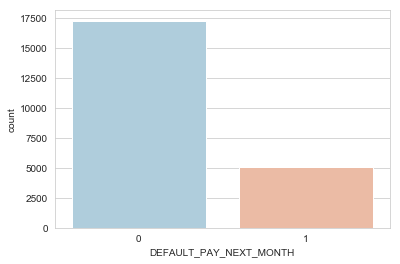

In [14]:
# visualize value counts of target column
sns.set_style('whitegrid')
sns.countplot(x='DEFAULT_PAY_NEXT_MONTH',data=df_cleaned,palette='RdBu_r')

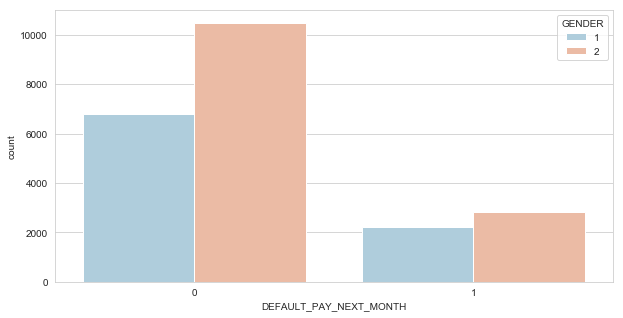

In [285]:
sns.set_style('whitegrid')
sns.countplot(x='DEFAULT_PAY_NEXT_MONTH',hue='GENDER',data=df_cleaned,palette='RdBu_r')

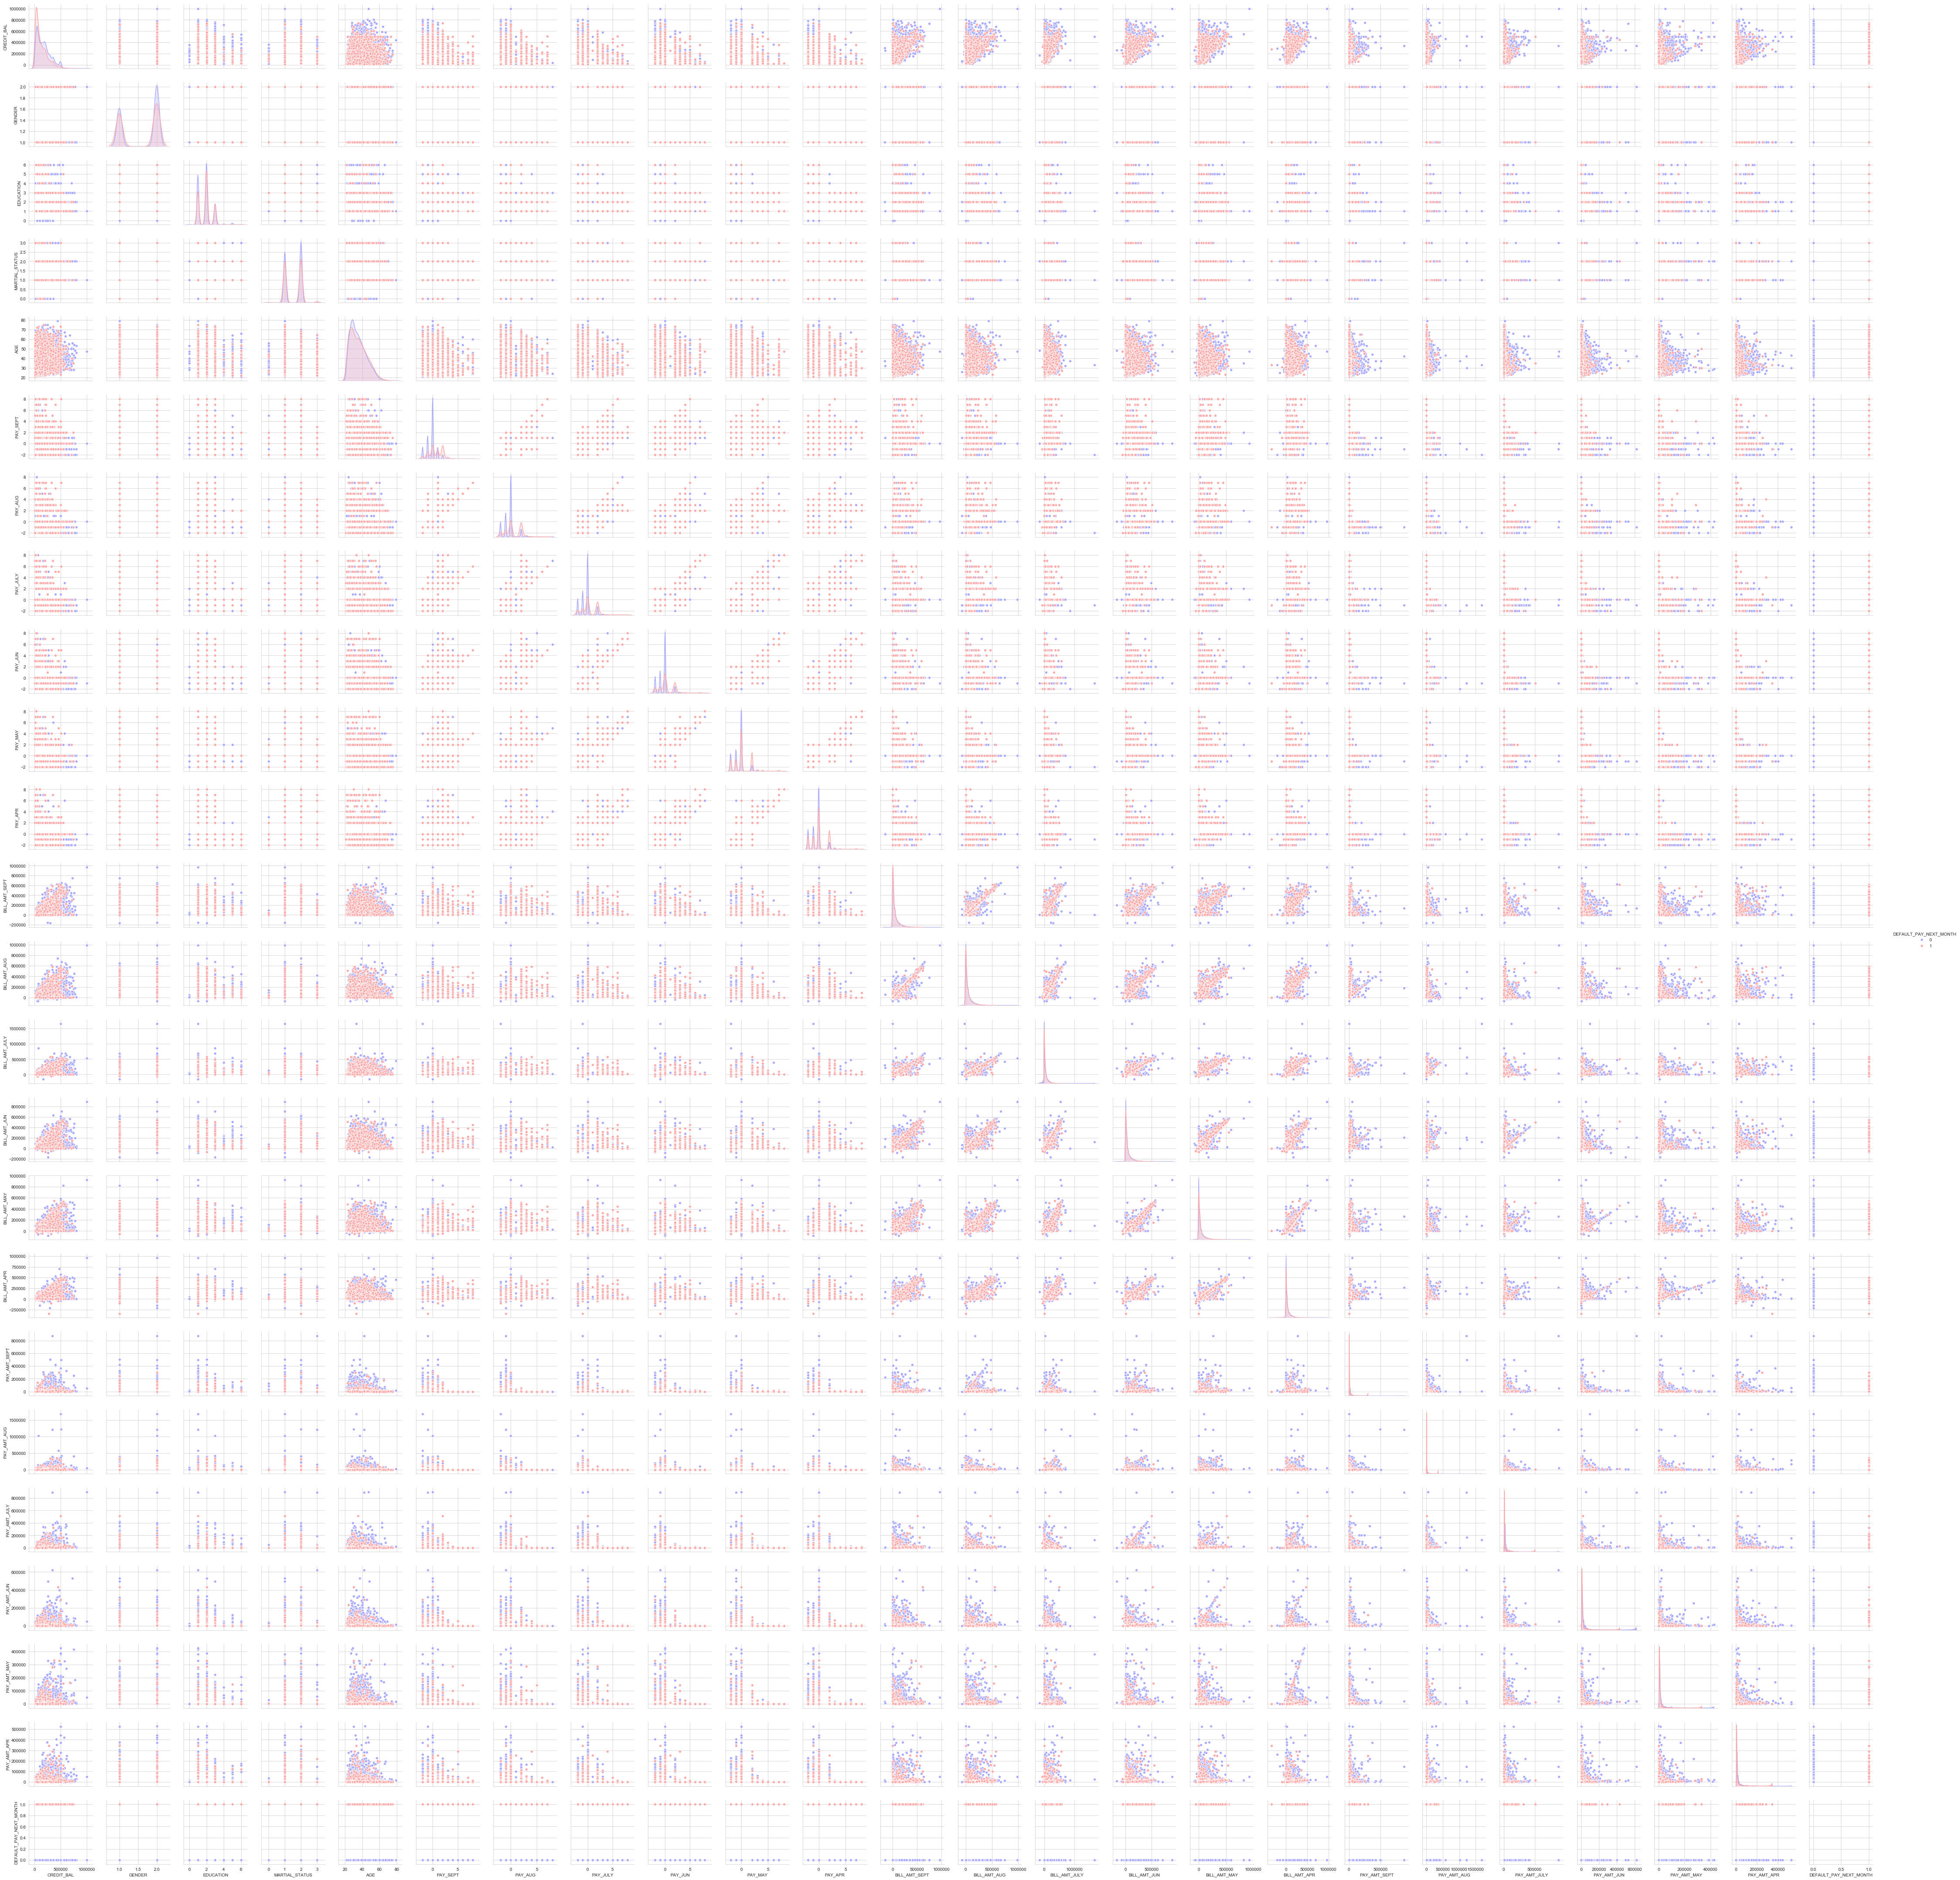

In [286]:
sns.pairplot(df_cleaned,hue='DEFAULT_PAY_NEXT_MONTH',palette='bwr')

Text(0, 0.5, 'Number of People')

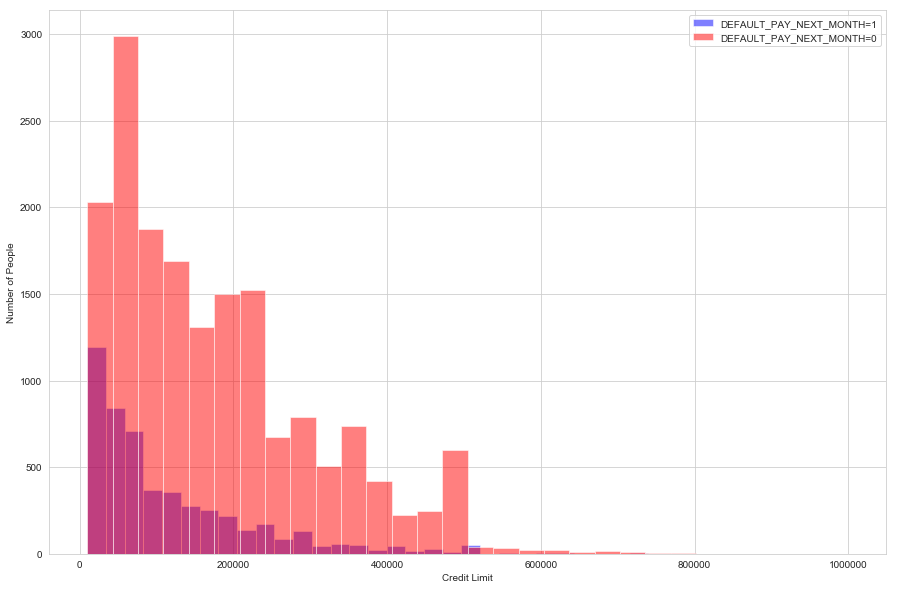

In [17]:
# look at the relationship between credit limit and default pay next month
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
df_cleaned[df_cleaned['DEFAULT_PAY_NEXT_MONTH']==1]['CREDIT_BAL'].hist(alpha=0.5,color='blue',
                                              bins=30,label='DEFAULT_PAY_NEXT_MONTH=1')
df_cleaned[df_cleaned['DEFAULT_PAY_NEXT_MONTH']==0]['CREDIT_BAL'].hist(alpha=0.5,color='red',
                                              bins=30,label='DEFAULT_PAY_NEXT_MONTH=0')
plt.legend()
plt.xlabel('Credit Limit')
plt.ylabel('Number of People')

## 3. Feature Engineering

In [13]:
# subset of bill and pay amount data
amt = df_cleaned[['BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JULY', 'BILL_AMT_JUN',
       'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG',
       'PAY_AMT_JULY', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']].copy()

In [150]:
amt.head()

BILL_AMT_SEPT  BILL_AMT_AUG  BILL_AMT_JULY  BILL_AMT_JUN  BILL_AMT_MAY  \
ID                                                                           
2            2682          1725           2682          3272          3455   
3           29239         14027          13559         14331         14948   
4           46990         48233          49291         28314         28959   
5            8617          5670          35835         20940         19146   
6           64400         57069          57608         19394         19619   

    BILL_AMT_APR  PAY_AMT_SEPT  PAY_AMT_AUG  PAY_AMT_JULY  PAY_AMT_JUN  \
ID                                                                       
2           3261             0         1000          1000         1000   
3          15549          1518         1500          1000         1000   
4          29547          2000         2019          1200         1100   
5          19131          2000        36681         10000         9000   
6          20024          2500         1815           657         1000   

    PAY_AMT_MAY  PAY_AMT_APR  
ID                            
2             0         2000  
3          1000         5000  
4          1069         1000  
5           689          679  
6          1000          800

In [14]:
# function to find ratio of paid amt/bill amt
def pay_bill_ratio(pay_amt, bill_amt):
    return pay_amt/bill_amt

In [15]:
# create new variables with proportion of amount paid per month
amt['PAID_RATIO_SEPT'] = pay_bill_ratio(amt['PAY_AMT_SEPT'], amt['BILL_AMT_SEPT'])
amt['PAID_RATIO_AUG'] = pay_bill_ratio(amt['PAY_AMT_AUG'], amt['BILL_AMT_AUG'])
amt['PAID_RATIO_JULY'] = pay_bill_ratio(amt['PAY_AMT_JULY'], amt['BILL_AMT_JULY'])
amt['PAID_RATIO_JUN'] = pay_bill_ratio(amt['PAY_AMT_JUN'], amt['BILL_AMT_JUN'])
amt['PAID_RATIO_MAY'] = pay_bill_ratio(amt['PAY_AMT_MAY'], amt['BILL_AMT_MAY'])
amt['PAID_RATIO_APR'] = pay_bill_ratio(amt['PAY_AMT_APR'], amt['BILL_AMT_APR'])

In [16]:
# drop columns
amt.drop(['BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JULY', 'BILL_AMT_JUN',
       'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG',
       'PAY_AMT_JULY', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR'], axis=1, inplace=True)

In [154]:
amt.head(7477)

PAID_RATIO_SEPT  PAID_RATIO_AUG  PAID_RATIO_JULY  PAID_RATIO_JUN  \
ID                                                                        
2             0.000000        0.579710         0.372856        0.305623   
3             0.051917        0.106937         0.073752        0.069779   
4             0.042562        0.041859         0.024345        0.038850   
5             0.232099        6.469312         0.279057        0.429799   
6             0.038820        0.031804         0.011405        0.051562   
7             0.149471        0.097082         0.085392        0.037296   
9             0.294993        0.000000         0.035679        0.081893   
11            0.208254        0.001226         0.009033        0.119379   
12            1.779463        0.459898         0.861228        2.618410   
13            0.082393        1.000000         1.000000        1.000000   
14            0.048631        0.000000         0.045661        0.044922   
15            0.042321        0.044736         0.047199        0.050255   
16            0.000000        0.051417         0.039124        0.041709   
17            0.208117        0.000000         0.086068        0.000000   
18            0.040894        0.040562         0.390110        0.285413   
21            0.078211        0.055511         0.040835        0.097012   
23            0.048848        0.084392         0.000000        0.081830   
26            0.041432        0.034107         0.027788        0.049436   
28            0.057673        0.080555         0.058265        0.083902   
29            5.253846        1.001757         0.598361       14.916667   
30            0.097854        0.090498         0.057156        0.055844   
31            1.037486        0.769244         1.156264        0.932721   
32            0.056295        0.050645         0.045245        0.043987   
33            0.032493        0.041762         0.039841        0.039576   
34            0.379907        5.497832         0.331001        9.498604   
37            0.043034        0.044450         0.034918        0.037556   
40           18.222892        0.000000         2.149537        0.801925   
41            0.045731        0.031632         0.029000        0.300366   
42            0.044431        0.067165         0.063207        0.039247   
43            0.799148        0.919284         0.166583        0.083893   
...                ...             ...              ...             ...   
10203         0.010629        0.895551         0.035761        0.036496   
10204         0.045732        0.046967         0.070026        0.071425   
10205         0.036951        0.037017         0.038815        0.077678   
10206         0.098658        0.065293         0.317971        0.105995   
10207         0.650386        7.424603         0.120032       20.240449   
10208         0.105045        0.061081         0.049790        0.081965   
10210         0.103352        0.000000         0.062582        0.060938   
10211         0.060125        0.108825         0.000000        0.053915   
10212         0.283930        0.202703         0.285755        0.123320   
10213         0.182091        0.000000         0.033237        0.405268   
10214         0.000000        0.014470         1.474926        0.000000   
10215         0.048153        0.044620         0.040240        0.037362   
10216         0.000000        0.000000         0.000000        0.000000   
10217         0.038246        0.039921         0.000547        1.685786   
10218         0.825195        0.154211        24.302564        0.000000   
10219         0.269296        1.632251         0.015980        0.006978   
10220         0.039571        0.030486         0.013676        0.018424   
10221         0.060516       23.738086         0.025307        0.071634   
10222         0.073692        0.040458         0.036502        0.044824   
10223         0.038210        0.065381         0.043678        0.105374   
10224         0.035187        0.

In [17]:
# refresh data - subset of bill and pay amount data
amt = df_cleaned[['BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JULY', 'BILL_AMT_JUN',
       'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG',
       'PAY_AMT_JULY', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']].copy()

In [18]:
# create new column with total bill amount April-September
amt['TOTAL_BILL'] = amt.loc[:, 'BILL_AMT_SEPT':'BILL_AMT_APR'].sum(axis=1)

In [19]:
# create new column with total paid amount April-September
amt['TOTAL_PAID'] = amt.loc[:, 'PAY_AMT_SEPT':'PAY_AMT_APR'].sum(axis=1)

In [20]:
# create new column with average paid amount April-September
amt['RATIO_PAID'] = pay_bill_ratio(amt.TOTAL_PAID, amt.TOTAL_BILL)

In [21]:
# check for null values in Average Paid column
amt[amt.RATIO_PAID.isnull() == True].sum()

BILL_AMT_SEPT    0.0
BILL_AMT_AUG     0.0
BILL_AMT_JULY    0.0
BILL_AMT_JUN     0.0
BILL_AMT_MAY     0.0
BILL_AMT_APR     0.0
PAY_AMT_SEPT     0.0
PAY_AMT_AUG      0.0
PAY_AMT_JULY     0.0
PAY_AMT_JUN      0.0
PAY_AMT_MAY      0.0
PAY_AMT_APR      0.0
TOTAL_BILL       0.0
TOTAL_PAID       0.0
RATIO_PAID       0.0
dtype: float64

In [160]:
amt.columns

Index(['BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JULY', 'BILL_AMT_JUN',
       'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG',
       'PAY_AMT_JULY', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR',
       'TOTAL_BILL', 'TOTAL_PAID', 'RATIO_PAID'],
      dtype='object')

In [22]:
# drop columns
amt.drop(['BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JULY', 'BILL_AMT_JUN',
       'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG',
       'PAY_AMT_JULY', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR',], axis=1, inplace=True)

In [28]:
amt.describe()

TOTAL_BILL    TOTAL_PAID    RATIO_PAID
count  2.234100e+04  2.234100e+04  22341.000000
mean   3.428212e+05  3.515831e+04      0.280110
std    4.083441e+05  6.208311e+04      0.712942
min    7.200000e+01  0.000000e+00      0.000000
25%    7.970000e+04  8.863000e+03      0.041015
50%    1.965170e+05  1.763600e+04      0.066759
75%    4.522370e+05  3.731000e+04      0.310961
max    5.263883e+06  3.764066e+06     49.498889

In [163]:
# look at the infinity values in Average Paid and rest of the df
amt.sort_values(by='RATIO_PAID', ascending=False)

TOTAL_BILL  TOTAL_PAID  RATIO_PAID
ID                                       
17101         900       44549   49.498889
27556        2340       98652   42.158974
21349         683       20402   29.871157
16769        1555       44145   28.389068
11850        6818      166732   24.454679
3816           72        1393   19.347222
20057       15826      192289   12.150196
21631       16270      171660   10.550707
13000        3232       32896   10.178218
6595         8777       83636    9.528996
10537        3528       32324    9.162132
11302         324        2966    9.154321
24220        6582       59172    8.989973
20452       10864       89898    8.274853
8393        15862      116181    7.324486
8901        11912       86299    7.244711
5844         4700       33505    7.128723
22677       13728       95557    6.960737
1662         1790       12040    6.726257
4734         8486       47076    5.547490
24910       23110      122480    5.299870
8084        37783      198671    5.258211
14654       32870      166549    5.066900
4542         6500       32881    5.058615
3085         2580       12948    5.018605
1213         8559       42547    4.971025
20025        8838       41984    4.750396
4145         6990       32747    4.684835
21909        3606       16473    4.568220
9042        10259       46182    4.501608
...           ...         ...         ...
19250        5900           0    0.000000
16490        6300           0    0.000000
8655        14400           0    0.000000
24398        6300           0    0.000000
28852       15000           0    0.000000
16555       13800           0    0.000000
16559        9900           0    0.000000
12433        9900           0    0.000000
12431        9900           0    0.000000
24346       15000           0    0.000000
8844       147650           0    0.000000
28985        6200           0    0.000000
16789       14274           0    0.000000
12019       15000           0    0.000000
29287       70550           0    0.000000
29152       11700           0    0.000000
4007         6300           0    0.000000
18911        3300           0    0.000000
8998       639991           0    0.000000
11988        6300           0    0.000000
5838        14400           0    0.000000
11845        9000           0    0.000000
16933       13530           0    0.000000
26802       15000           0    0.000000
24168       14400           0    0.000000
29250        9900           0    0.000000
11740       30000           0    0.000000
11706        6300           0    0.000000
24156       15000           0    0.000000
16854        3300           0    0.000000

[22341 rows x 3 columns]

In [29]:
# count number of null values under Ratio Paid column
amt[amt.RATIO_PAID.isnull() == True].count()

TOTAL_BILL    0
TOTAL_PAID    0
RATIO_PAID    0
dtype: int64

In [30]:
# count number of Ratio Paid = infinity which would be due to dividing a number by 0
amt[amt.RATIO_PAID == np.inf].count()

TOTAL_BILL    0
TOTAL_PAID    0
RATIO_PAID    0
dtype: int64

In [23]:
# merge new features into main dataframe
df_cleaned = df_cleaned.merge(amt, on='ID')

In [32]:
df_cleaned.head()

CREDIT_BAL  GENDER  EDUCATION  MARTIAL_STATUS  AGE  PAY_SEPT  PAY_AUG  \
ID                                                                          
2       120000       2          2               2   26        -1        2   
3        90000       2          2               2   34         0        0   
4        50000       2          2               1   37         0        0   
5        50000       1          2               1   57        -1        0   
6        50000       1          1               2   37         0        0   

    PAY_JULY  PAY_JUN  PAY_MAY  ...  PAY_AMT_SEPT  PAY_AMT_AUG  PAY_AMT_JULY  \
ID                              ...                                            
2          0        0        0  ...             0         1000          1000   
3          0        0        0  ...          1518         1500          1000   
4          0        0        0  ...          2000         2019          1200   
5         -1        0        0  ...          2000        36681         10000   
6          0        0        0  ...          2500         1815           657   

    PAY_AMT_JUN  PAY_AMT_MAY  PAY_AMT_APR  DEFAULT_PAY_NEXT_MONTH  TOTAL_BILL  \
ID                                                                              
2          1000            0         2000                       1       17077   
3          1000         1000         5000                       0      101653   
4          1100         1069         1000                       0      231334   
5          9000          689          679                       0      109339   
6          1000         1000          800                       0      238114   

    TOTAL_PAID  RATIO_PAID  
ID                          
2         5000    0.292791  
3        11018    0.108388  
4         8388    0.036259  
5        59049    0.540054  
6         7772    0.032640  

[5 rows x 27 columns]

In [24]:
# remove observations with ratio_paid > 1
df_cleaned = df_cleaned[df_cleaned.RATIO_PAID <=1]

In [34]:
df_cleaned.describe()

CREDIT_BAL        GENDER     EDUCATION  MARTIAL_STATUS  \
count    20977.000000  20977.000000  20977.000000    20977.000000   
mean    156010.853792      1.592220      1.884874        1.565524   
std     128189.732546      0.491434      0.723336        0.518452   
min      10000.000000      1.000000      1.000000        1.000000   
25%      50000.000000      1.000000      1.000000        1.000000   
50%     120000.000000      2.000000      2.000000        2.000000   
75%     220000.000000      2.000000      2.000000        2.000000   
max    1000000.000000      2.000000      4.000000        3.000000   

                AGE      PAY_SEPT       PAY_AUG      PAY_JULY       PAY_JUN  \
count  20977.000000  20977.000000  20977.000000  20977.000000  20977.000000   
mean      35.257472      0.219431      0.253373      0.233637      0.198741   
std        9.308547      0.982759      1.021002      1.007077      0.982019   
min       21.000000     -1.000000     -1.000000     -1.000000     -1.000000   
25%       28.000000      0.000000      0.000000      0.000000      0.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

            PAY_MAY  ...   PAY_AMT_SEPT    PAY_AMT_AUG   PAY_AMT_JULY  \
count  20977.000000  ...   20977.000000   20977.000000   20977.000000   
mean       0.161415  ...    6189.936359    6212.899366    5542.171521   
std        0.939925  ...   15853.031642   17426.011601   16763.709446   
min       -1.000000  ...       0.000000       0.000000       0.000000   
25%        0.000000  ...    1500.000000    1498.000000    1027.000000   
50%        0.000000  ...    2901.000000    2667.000000    2104.000000   
75%        0.000000  ...    5757.000000    5496.000000    5000.000000   
max        8.000000  ...  423903.000000  580464.000000  896040.000000   

         PAY_AMT_JUN    PAY_AMT_MAY    PAY_AMT_APR  DEFAULT_PAY_NEXT_MONTH  \
count   20977.000000   20977.000000   20977.000000            20977.000000   
mean     5083.882919    5116.305382    4799.578205                0.233780   
std     14499.461223   14854.309586   15100.608163                0.423244   
min         0.000000       0.000000       0.000000                0.000000   
25%       903.000000     971.000000     733.000000                0.000000   
50%      2000.000000    2000.000000    2000.000000                0.000000   
75%      5000.000000    5000.000000    4438.000000                0.000000   
max    528897.000000  426529.000000  443001.000000                1.000000   

         TOTAL_BILL    TOTAL_PAID    RATIO_PAID  
count  2.097700e+04  2.097700e+04  20977.000000  
mean   3.616283e+05  3.294477e+04      0.198386  
std    4.139274e+05  5.246390e+04      0.270638  
min    2.220000e+02  0.000000e+00      0.000000  
25%    9.541700e+04  8.674000e+03      0.040378  
50%    2.144890e+05  1.700000e+04      0.060423  
75%    4.779170e+05  3.548800e+04      0.213960  
max    5.263883e+06  1.415333e+06      1.000000  

[8 rows x 27 columns]

In [25]:
# interaction variable to look at the relationship between credit balance and ratio paid
df_cleaned['CREDIT_BALxRATIO_PAID'] = df_cleaned['CREDIT_BAL']*df_cleaned['RATIO_PAID']

In [171]:
df_cleaned.head()

CREDIT_BAL  GENDER  EDUCATION  MARTIAL_STATUS  AGE  PAY_SEPT  PAY_AUG  \
ID                                                                          
2       120000       2          2               2   26        -1        2   
3        90000       2          2               2   34         0        0   
4        50000       2          2               1   37         0        0   
5        50000       1          2               1   57        -1        0   
6        50000       1          1               2   37         0        0   

    PAY_JULY  PAY_JUN  PAY_MAY  ...  PAY_AMT_AUG  PAY_AMT_JULY  PAY_AMT_JUN  \
ID                              ...                                           
2          0        0        0  ...         1000          1000         1000   
3          0        0        0  ...         1500          1000         1000   
4          0        0        0  ...         2019          1200         1100   
5         -1        0        0  ...        36681         10000         9000   
6          0        0        0  ...         1815           657         1000   

    PAY_AMT_MAY  PAY_AMT_APR  DEFAULT_PAY_NEXT_MONTH  TOTAL_BILL  TOTAL_PAID  \
ID                                                                             
2             0         2000                       1       17077        5000   
3          1000         5000                       0      101653       11018   
4          1069         1000                       0      231334        8388   
5           689          679                       0      109339       59049   
6          1000          800                       0      238114        7772   

    RATIO_PAID  CREDIT_BALxRATIO_PAID  
ID                                     
2     0.292791           35134.976869  
3     0.108388            9754.950665  
4     0.036259            1812.963075  
5     0.540054           27002.716323  
6     0.032640            1631.991399  

[5 rows x 28 columns]

## 4. Feature Selection

In [26]:
# import libraries
from sklearn.model_selection import train_test_split

In [37]:
df_cleaned.columns

Index(['CREDIT_BAL', 'GENDER', 'EDUCATION', 'MARTIAL_STATUS', 'AGE',
       'PAY_SEPT', 'PAY_AUG', 'PAY_JULY', 'PAY_JUN', 'PAY_MAY', 'PAY_APR',
       'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JULY', 'BILL_AMT_JUN',
       'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG',
       'PAY_AMT_JULY', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR',
       'DEFAULT_PAY_NEXT_MONTH', 'TOTAL_BILL', 'TOTAL_PAID', 'RATIO_PAID',
       'CREDIT_BALxRATIO_PAID'],
      dtype='object')

In [27]:
# define X and y
X = df_cleaned.drop('DEFAULT_PAY_NEXT_MONTH', axis=1)
y = df_cleaned.DEFAULT_PAY_NEXT_MONTH

In [28]:
# create training and testing data sets with 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

### Scaling the data

In [29]:
#Standardize the Variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_cleaned.drop('DEFAULT_PAY_NEXT_MONTH', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
#Use the .transform() method to transform the features to a scaled version.
scaled_features = scaler.transform(df_cleaned.drop('DEFAULT_PAY_NEXT_MONTH', axis=1))
df_feat = pd.DataFrame(scaled_features,columns=X.columns)
df_feat.head()

CREDIT_BAL    GENDER  EDUCATION  MARTIAL_STATUS       AGE  PAY_SEPT  \
0   -0.280925  0.829796   0.159164        0.838045 -0.994537 -1.240853   
1   -0.514959  0.829796   0.159164        0.838045 -0.135091 -0.223286   
2   -0.827004  0.829796   0.159164       -1.090820  0.187201 -0.223286   
3   -0.827004 -1.205115   0.159164       -1.090820  2.335815 -1.240853   
4   -0.827004 -1.205115  -1.223352        0.838045  0.187201 -0.223286   

    PAY_AUG  PAY_JULY   PAY_JUN   PAY_MAY  ...  PAY_AMT_SEPT  PAY_AMT_AUG  \
0  1.710740 -0.232001 -0.202385 -0.171736  ...     -0.390467    -0.299152   
1 -0.248167 -0.232001 -0.202385 -0.171736  ...     -0.294710    -0.270458   
2 -0.248167 -0.232001 -0.202385 -0.171736  ...     -0.264305    -0.240675   
3 -0.248167 -1.224997 -0.202385 -0.171736  ...     -0.264305     1.748468   
4 -0.248167 -0.232001 -0.202385 -0.171736  ...     -0.232765    -0.252382   

   PAY_AMT_JULY  PAY_AMT_JUN  PAY_AMT_MAY  PAY_AMT_APR  TOTAL_BILL  \
0     -0.270959    -0.281664    -0.344441    -0.185399   -0.832415   
1     -0.270959    -0.281664    -0.277118     0.013273   -0.628085   
2     -0.259028    -0.274767    -0.272473    -0.251624   -0.314783   
3      0.265928     0.270094    -0.298056    -0.272881   -0.609516   
4     -0.291420    -0.281664    -0.277118    -0.264868   -0.298403   

   TOTAL_PAID  RATIO_PAID  CREDIT_BALxRATIO_PAID  
0   -0.532660    0.348835              -0.061688  
1   -0.417950   -0.332546              -0.388604  
2   -0.468081   -0.599067              -0.490904  
3    0.497577    1.262486              -0.166438  
4   -0.479823   -0.612441              -0.493235  

[5 rows x 27 columns]

### Correlation

In [42]:
# Create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

CREDIT_BAL    GENDER  EDUCATION  MARTIAL_STATUS  \
CREDIT_BAL                    NaN  0.020932   0.219385        0.098716   
GENDER                        NaN       NaN   0.016693        0.032520   
EDUCATION                     NaN       NaN        NaN        0.163387   
MARTIAL_STATUS                NaN       NaN        NaN             NaN   
AGE                           NaN       NaN        NaN             NaN   
PAY_SEPT                      NaN       NaN        NaN             NaN   
PAY_AUG                       NaN       NaN        NaN             NaN   
PAY_JULY                      NaN       NaN        NaN             NaN   
PAY_JUN                       NaN       NaN        NaN             NaN   
PAY_MAY                       NaN       NaN        NaN             NaN   
PAY_APR                       NaN       NaN        NaN             NaN   
BILL_AMT_SEPT                 NaN       NaN        NaN             NaN   
BILL_AMT_AUG                  NaN       NaN        NaN             NaN   
BILL_AMT_JULY                 NaN       NaN        NaN             NaN   
BILL_AMT_JUN                  NaN       NaN        NaN             NaN   
BILL_AMT_MAY                  NaN       NaN        NaN             NaN   
BILL_AMT_APR                  NaN       NaN        NaN             NaN   
PAY_AMT_SEPT                  NaN       NaN        NaN             NaN   
PAY_AMT_AUG                   NaN       NaN        NaN             NaN   
PAY_AMT_JULY                  NaN       NaN        NaN             NaN   
PAY_AMT_JUN                   NaN       NaN        NaN             NaN   
PAY_AMT_MAY                   NaN       NaN        NaN             NaN   
PAY_AMT_APR                   NaN       NaN        NaN             NaN   
TOTAL_BILL                    NaN       NaN        NaN             NaN   
TOTAL_PAID                    NaN       NaN        NaN             NaN   
RATIO_PAID                    NaN       NaN        NaN             NaN   
CREDIT_BALxRATIO_PAID         NaN       NaN        NaN             NaN   

                            AGE  PAY_SEPT   PAY_AUG  PAY_JULY   PAY_JUN  \
CREDIT_BAL             0.120332  0.244610  0.254612  0.247707  0.242863   
GENDER                 0.103323  0.047379  0.046000  0.048790  0.041449   
EDUCATION              0.203371  0.097661  0.082502  0.067426  0.064980   
MARTIAL_STATUS         0.405620  0.005149  0.005619  0.012054  0.010519   
AGE                         NaN  0.018225  0.025296  0.023675  0.014152   
PAY_SEPT                    NaN       NaN  0.757692  0.605123  0.552091   
PAY_AUG                     NaN       NaN       NaN  0.691537  0.571308   
PAY_JULY                    NaN       NaN       NaN       NaN  0.705042   
PAY_JUN                     NaN       NaN       NaN       NaN       NaN   
PAY_MAY                     NaN       NaN       NaN       NaN       NaN   
PAY_APR                     NaN       NaN       NaN       NaN       NaN   
BILL_AMT_SEPT               NaN       NaN       NaN       NaN       NaN   
BILL_AMT_AUG                NaN       NaN       NaN       NaN       NaN   
BILL_AMT_JULY               NaN       NaN       NaN       NaN       NaN   
BILL_AMT_JUN                NaN       NaN       NaN       NaN       NaN   
BILL_AMT_MAY                NaN       NaN       NaN       NaN       NaN   
BILL_AMT_APR                NaN       NaN       NaN       NaN       NaN   
PAY_AMT_SEPT                NaN       NaN       NaN       NaN       NaN   
PAY_AMT_AUG                 NaN       NaN       NaN       NaN       NaN   
PAY_AMT_JULY                NaN       NaN       NaN       NaN       NaN   
PAY_AMT_JUN                 NaN       NaN       NaN       NaN       NaN   
PAY_AMT_MAY                 NaN       NaN       NaN       NaN       NaN   
PAY_AMT_APR                 NaN       NaN       NaN       NaN       NaN   
TOTAL_BILL                  NaN       NaN       NaN       NaN       NaN   
TOTAL_PAID                  NaN       NaN       NaN       NaN       NaN   


### Decision Tree for Feature Selection

In [31]:
# Training a Decision Tree Model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

In [32]:
# Create an instance of DecisionTreeClassifier() called dtree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [33]:
# Calculate feature importances
importances = dtree.feature_importances_

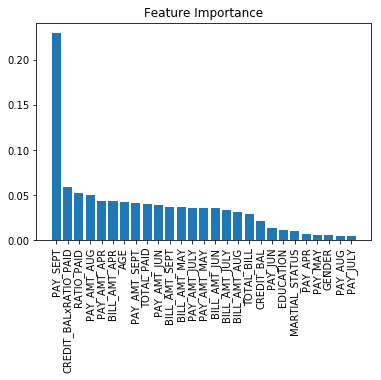

In [34]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [48]:
df_cleaned.columns

Index(['CREDIT_BAL', 'GENDER', 'EDUCATION', 'MARTIAL_STATUS', 'AGE',
       'PAY_SEPT', 'PAY_AUG', 'PAY_JULY', 'PAY_JUN', 'PAY_MAY', 'PAY_APR',
       'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JULY', 'BILL_AMT_JUN',
       'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG',
       'PAY_AMT_JULY', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR',
       'DEFAULT_PAY_NEXT_MONTH', 'TOTAL_BILL', 'TOTAL_PAID', 'RATIO_PAID',
       'CREDIT_BALxRATIO_PAID'],
      dtype='object')

In [35]:
df_cleaned = df_cleaned.drop(['PAY_JUN', 'PAY_MAY', 'PAY_APR',
       'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JULY', 'BILL_AMT_JUN',
       'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG',
       'PAY_AMT_JULY', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR'], axis=True)

In [50]:
df_cleaned.columns

Index(['CREDIT_BAL', 'GENDER', 'EDUCATION', 'MARTIAL_STATUS', 'AGE',
       'PAY_SEPT', 'PAY_AUG', 'PAY_JULY', 'DEFAULT_PAY_NEXT_MONTH',
       'TOTAL_BILL', 'TOTAL_PAID', 'RATIO_PAID', 'CREDIT_BALxRATIO_PAID'],
      dtype='object')

## 5. Model Fitting and Hyperparameter Tuning
KNN, Logistic Regression, Decision Tree

### Train Test Split

In [36]:
# Refresh Train Test Split

# define X and y
X = df_cleaned.drop('DEFAULT_PAY_NEXT_MONTH', axis=1)
y = df_cleaned.DEFAULT_PAY_NEXT_MONTH
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

### Fixing Class Imbalance

In [37]:
# Class count
count_class_0, count_class_1 = df_cleaned.DEFAULT_PAY_NEXT_MONTH.value_counts()

# Divide by class
df_class_0 = df_cleaned[df_cleaned['DEFAULT_PAY_NEXT_MONTH'] == 0]
df_class_1 = df_cleaned[df_cleaned['DEFAULT_PAY_NEXT_MONTH'] == 1]

In [41]:
count_class_0,count_class_1

(16073, 4904)

Random under-sampling:
1    4904
0    4904
Name: DEFAULT_PAY_NEXT_MONTH, dtype: int64


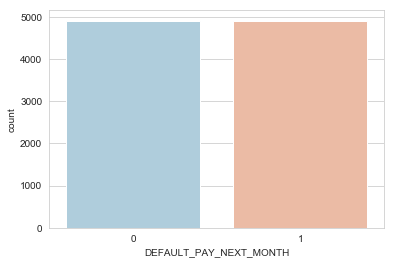

In [38]:
# Random undersampling
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.DEFAULT_PAY_NEXT_MONTH.value_counts())

sns.set_style('whitegrid')
sns.countplot(x='DEFAULT_PAY_NEXT_MONTH',data=df_test_under, palette='RdBu_r')

In [54]:
df_test_under.head()

CREDIT_BAL  GENDER  EDUCATION  MARTIAL_STATUS  AGE  PAY_SEPT  PAY_AUG  \
ID                                                                             
2074       250000       1          2               1   50        -1       -1   
15358      280000       2          1               2   33         2        0   
312        180000       2          2               1   34         0        0   
7160       150000       2          1               2   35        -1       -1   
19835       70000       2          3               1   43         2        0   

       PAY_JULY  DEFAULT_PAY_NEXT_MONTH  TOTAL_BILL  TOTAL_PAID  RATIO_PAID  \
ID                                                                            
2074         -1                       0       30833       30833    1.000000   
15358         0                       0       56517       17000    0.300794   
312           0                       0      827666       32000    0.038663   
7160         -1                       0       50874       43328    0.851673   
19835         0                       0      200967        7143    0.035543   

       CREDIT_BALxRATIO_PAID  
ID                            
2074           250000.000000  
15358           84222.446344  
312              6959.329005  
7160           127750.914023  
19835            2488.020421

### Scaling the data

In [340]:
#Standardize the Variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_test_under.drop('DEFAULT_PAY_NEXT_MONTH', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [341]:
#Use the .transform() method to transform the features to a scaled version.
scaled_features = scaler.transform(df_test_under.drop('DEFAULT_PAY_NEXT_MONTH', axis=1))
df_feat = pd.DataFrame(scaled_features,columns=X.columns)
df_feat.head()

CREDIT_BAL    GENDER  EDUCATION  MARTIAL_STATUS       AGE  PAY_SEPT  \
0    0.554471 -1.181893  -1.272161        0.857022 -0.248331 -1.272234   
1   -0.741824  0.846100   0.133897        0.857022 -0.775890 -0.408161   
2    0.068360  0.846100  -1.272161        0.857022  3.022533  0.455911   
3   -0.093677  0.846100   0.133897        0.857022 -0.670378 -0.408161   
4    1.445674  0.846100  -1.272161        0.857022 -0.670378 -0.408161   

    PAY_AUG  PAY_JULY  TOTAL_BILL  TOTAL_PAID  RATIO_PAID  \
0 -1.274935 -1.250386   -0.829017   -0.493881    3.176674   
1 -0.411658 -0.377891   -0.428190   -0.419134   -0.521119   
2  1.314895 -0.377891    0.759622    0.056445   -0.508916   
3 -0.411658 -0.377891    0.417650   -0.221372   -0.562867   
4 -0.411658 -0.377891    1.959927    0.531098   -0.508106   

   CREDIT_BALxRATIO_PAID  
0               2.453670  
1              -0.437164  
2              -0.368737  
3              -0.407200  
4              -0.255208

In [42]:
# Refresh Train Test Split after fixing class imbalance

# define X and y
X = df_test_under.drop('DEFAULT_PAY_NEXT_MONTH', axis=1)
y = df_test_under.DEFAULT_PAY_NEXT_MONTH
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

### Model Fitting

#### Logistic Regression


In [43]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

In [44]:
# Logistic Regression

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [45]:
# Create a classification report for the model on training data
preds_train = logmodel.predict(X_train)
print(classification_report(y_train, preds_train))

              precision    recall  f1-score   support

           0       0.67      0.48      0.56      3904
           1       0.60      0.77      0.67      3942

   micro avg       0.62      0.62      0.62      7846
   macro avg       0.63      0.62      0.62      7846
weighted avg       0.63      0.62      0.62      7846



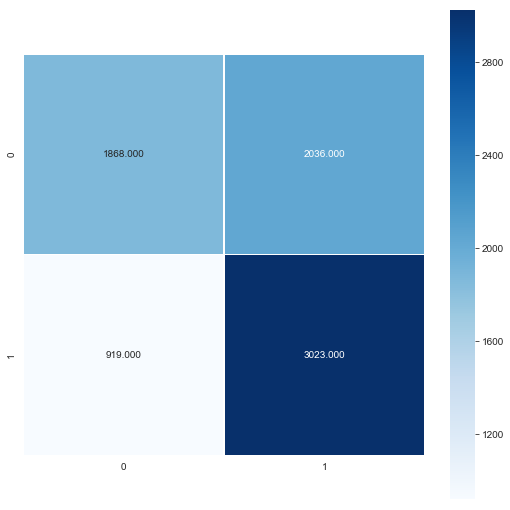

In [46]:
#confusion matrix visualization of train data
cm_lr = confusion_matrix(y_train, preds_train)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [47]:
#Predictions and Evaluations
preds_test = logmodel.predict(X_test)
print(classification_report(y_test, preds_test))

              precision    recall  f1-score   support

           0       0.70      0.48      0.57      1000
           1       0.59      0.78      0.67       962

   micro avg       0.63      0.63      0.63      1962
   macro avg       0.64      0.63      0.62      1962
weighted avg       0.64      0.63      0.62      1962



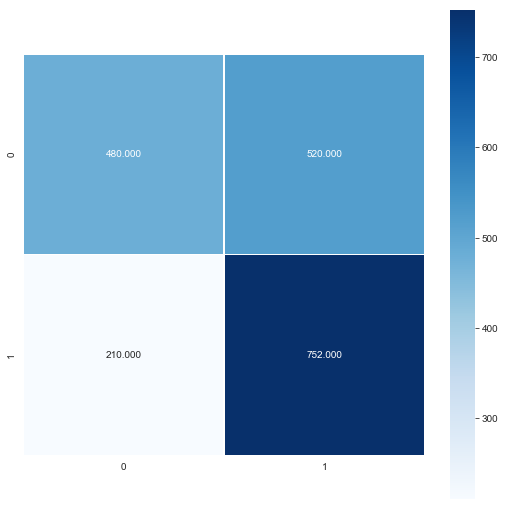

In [48]:
#confusion matrix visualization of test data
cm_lr = confusion_matrix(y_test, preds_test)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [49]:
# Model Accuracy, how often is the classifier correct?
print('Training F1 Score:', f1_score(y_train, preds_train))
print('Testing F1 Score:', f1_score(y_test, preds_test))

Training F1 Score: 0.6717031440951006
Testing F1 Score: 0.6732318710832588


#### KNN

In [50]:
# Using KNN

from sklearn.neighbors import KNeighborsClassifier

In [51]:
# Create a KNN model

knn = KNeighborsClassifier()

In [52]:
# Fit this KNN model to the training data.

knn.fit(X_train, y_train)
pred_train = knn.predict(X_train)
print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

[[2859 1045]
 [1121 2821]]
              precision    recall  f1-score   support

           0       0.72      0.73      0.73      3904
           1       0.73      0.72      0.72      3942

   micro avg       0.72      0.72      0.72      7846
   macro avg       0.72      0.72      0.72      7846
weighted avg       0.72      0.72      0.72      7846



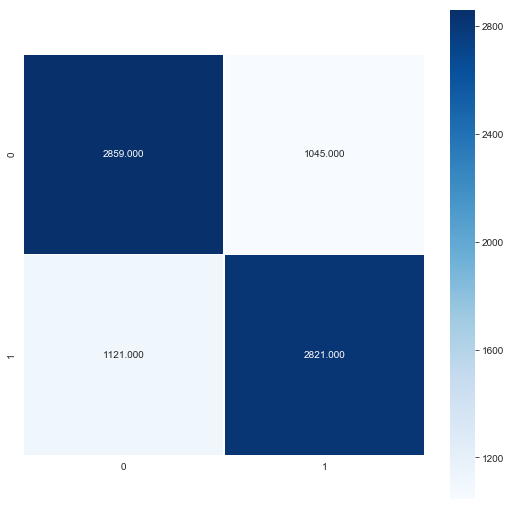

In [53]:
#confusion matrix visualization of train data
cm_lr = confusion_matrix(y_train, pred_train)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [54]:
#Predictions and Evaluations

pred_test = knn.predict(X_test)
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

[[589 411]
 [371 591]]
              precision    recall  f1-score   support

           0       0.61      0.59      0.60      1000
           1       0.59      0.61      0.60       962

   micro avg       0.60      0.60      0.60      1962
   macro avg       0.60      0.60      0.60      1962
weighted avg       0.60      0.60      0.60      1962



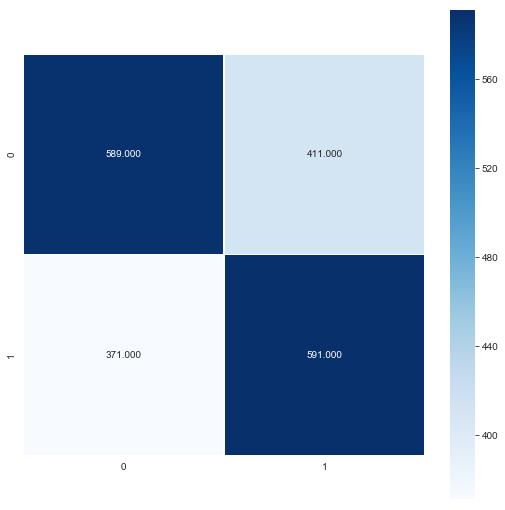

In [55]:
#confusion matrix visualization of train data
cm_lr = confusion_matrix(y_test, pred_test)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [56]:
# Model Accuracy, how often is the classifier correct?
print('Training F1 Score:', f1_score(y_train, pred_train))
print('Testing F1 Score:', f1_score(y_test, pred_test))

Training F1 Score: 0.7225922131147542
Testing F1 Score: 0.6018329938900203


#### Decision Tree Model

In [57]:
# Training a Decision Tree Model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

In [58]:
# Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [59]:
#predict the training set
predictions_train = dtree.predict(X_train)

In [60]:
#predict the testing set
predictions_test = dtree.predict(X_test)

In [61]:
# Model Accuracy, how often is the classifier correct?
print('Training F1 Score:', f1_score(y_train, predictions_train))
print('Testing F1 Score:', f1_score(y_test, predictions_test))

Training F1 Score: 1.0
Testing F1 Score: 0.6477565755544096


In [62]:
# Predictions and Evaluation of Decision Tree on Training Set

print(classification_report(y_train, predictions_train))
print(confusion_matrix(y_train, predictions_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3904
           1       1.00      1.00      1.00      3942

   micro avg       1.00      1.00      1.00      7846
   macro avg       1.00      1.00      1.00      7846
weighted avg       1.00      1.00      1.00      7846

[[3904    0]
 [   0 3942]]


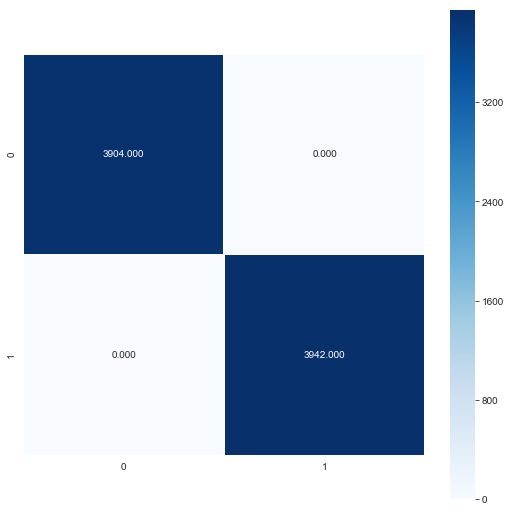

In [63]:
#confusion matrix visualization of train data
cm_lr = confusion_matrix(y_train, predictions_train)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [64]:
# Predictions and Evaluation of Decision Tree on Testing Set

print(classification_report(y_test, predictions_test))
print(confusion_matrix(y_test, predictions_test))

              precision    recall  f1-score   support

           0       0.66      0.65      0.66      1000
           1       0.64      0.65      0.65       962

   micro avg       0.65      0.65      0.65      1962
   macro avg       0.65      0.65      0.65      1962
weighted avg       0.65      0.65      0.65      1962

[[651 349]
 [334 628]]


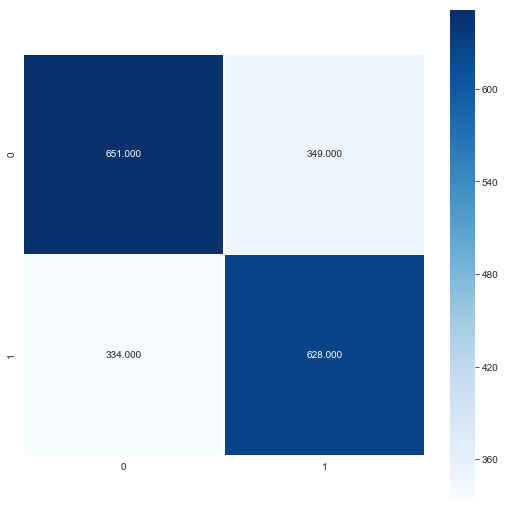

In [65]:
#confusion matrix visualization of train data
cm_lr = confusion_matrix(y_test, predictions_test)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

### Hyperparameter Tuning

In [66]:
#import libraries

from sklearn.model_selection import GridSearchCV

#### Logistic Regression


In [67]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = C_param_range = [0.001,0.01,0.1, 0.5, 1, 2, 5, 10]

# Create hyperparameter options
hyperparameters_lr = dict(C=C, penalty=penalty)

In [68]:
#Use gridsearch with our pipeline to find best parameters

gs_lr = GridSearchCV(estimator=logmodel,
                     param_grid=hyperparameters_lr,
                     scoring='f1',
                     cv=5)

In [69]:
# Fit the gridsearch object to the data

gs_lr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [70]:
# Identify the best performing models and see how it performs on the test set.

# Best params
print('Best params: %s' % gs_lr.best_params_)

# Best training data accuracy
print('Best training accuracy: %.3f' % gs_lr.best_score_)

# Predict on test data with best params
y_pred = gs_lr.predict(X_test)

# Test data accuracy of model with best params
print('Test set F1 score for best params: %.3f ' % f1_score(y_test, y_pred))

Best params: {'C': 0.001, 'penalty': 'l1'}
Best training accuracy: 0.681
Test set F1 score for best params: 0.678 


#### KNN

In [71]:
# Create the dictionary of hyperparameters we want to test

neighbors = list(range(1, 20, 2))
grid_params_KNN = [{'n_neighbors': neighbors,
                    'weights': ['uniform', 'distance']}]

In [72]:
# Use gridsearch with our pipeline to find best parameters

gs_KNN = GridSearchCV(estimator=knn,
                      param_grid=grid_params_KNN,
                      scoring='f1',
                      cv=5)

In [73]:
# Fit the gridsearch object to the data

gs_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'weights': ['uniform', 'distance']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [74]:
# Identify the best performing models and see how it performs on the test set.

# Best params
print('Best params: %s' % gs_KNN.best_params_)
# Best training data accuracy
print('Best training accuracy: %.3f' % gs_KNN.best_score_)
# Predict on test data with best params
y_pred = gs_KNN.predict(X_test)
# Test data accuracy of model with best params
print('Test set F1 score for best params: %.3f ' % f1_score(y_test, y_pred))

Best params: {'n_neighbors': 17, 'weights': 'uniform'}
Best training accuracy: 0.626
Test set F1 score for best params: 0.620 


#### Decision Tree Model

In [105]:
# Create the dictionary of hyperparameters we want to test

tree_depth_range = list(range(1, 20))
max_features_range = list(range(1, 10))
grid_params_dt = [{'max_depth': tree_depth_range,
                   'max_features': max_features_range,
                  'criterion': ['gini', 'entropy']}]

In [106]:
# Use gridsearch with our pipeline to find best parameters

gs_dt = GridSearchCV(estimator=dtree,
                     param_grid=grid_params_dt,
                     scoring='f1',
                     cv=5)

In [107]:
# Fit the gridsearch object to the data
gs_dt.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'criterion': ['gini', 'entropy']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [108]:
# Identify the best performing models and see how it performs on the test set.

# Best params
print('Best params: %s' % gs_dt.best_params_)
# Best training data accuracy
print('Best training accuracy: %.3f' % gs_dt.best_score_)
# Predict on test data with best params
y_pred = gs_dt.predict(X_test)
# Test data accuracy of model with best params
print('Test set F1 score for best params: %.3f ' % f1_score(y_test, y_pred))

Best params: {'criterion': 'gini', 'max_depth': 4, 'max_features': 5}
Best training accuracy: 0.700
Test set F1 score for best params: 0.710 


## 6. Model Evaluation

### Logistic Regression

According to hyperparameter testing, the results of the grid search were as follows: 
* Best params: {'C': 0.1, 'penalty': 'l1'}
* Best training accuracy: 0.683
* Test set F1 score for best params: 0.696<br>
<br>
It suggested that we should use Lasso regularization, most likely because we still had a good number of features which could have been dropped or their individual weights should be penalized to prevent overfitting. If we used these parameters, the F1 score for the testing data would be 0.696, which is higher than the inital logistic regression model we fitted prior to the tuning. In our initial logistic regression model, the F1 score was higher for the training dataset then the testing dataset which indicates some overfitting so including lasso regularization would reduce that.

### KNN

According to hyperparameter testing, the results of the grid search were as follows:
* Best params: {'n_neighbors': 15, 'weights': 'uniform'}
* Best training accuracy: 0.631
* Test set F1 score for best params: 0.627 <br>
<br>
It suggested that we use 15 neighbors for classification and that we should not consider how close one neighbor is to the point compared to the other in classifying it (all neighbors are weighted evenly). If we used these parameters, the F1 score for the testing data would be 0.627, which is lower than our logistic regression model. Therefore, we will not use this model.

### Decision Tree

According to hyperparameter testing, the results of the grid search were as follows:
* Best params: {'criterion': 'gini', 'max_depth': 4, 'max_features': 5}
* Best training accuracy: 0.700
* Test set F1 score for best params: 0.710 <br>
<br>
It suggested that we use the gini impurity index, max depth of 4, and with max features of 5. The F1 score for the testing data would be 0.710, which is higher than the score from the inital Decision Tree model. The initial model we had showed overfitting when we compare the F1 scores of the training and testing data sets. This was resolved by setting max features to 5 and also max depth of 4 by simplifying the model.

## 7. Final Model

### Decision Tree Model

In [110]:
final_model = DecisionTreeClassifier(criterion='gini', max_depth=4,
            max_features=5)

In [111]:
final_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [112]:
#predict the training set
final_preds_train = final_model.predict(X_train)

In [113]:
#predict the testing set
final_preds_test = final_model.predict(X_test)

In [114]:
# Model Accuracy, how often is the classifier correct?
print('Training F1 Score:', f1_score(y_train, final_preds_train))
print('Testing F1 Score:', f1_score(y_test, final_preds_test))

Training F1 Score: 0.7013060760931289
Testing F1 Score: 0.7111622554660528


In [115]:
# Predictions and Evaluation of Decision Tree on Training Set

print(classification_report(y_train, final_preds_train))
print(confusion_matrix(y_train, final_preds_train))

              precision    recall  f1-score   support

           0       0.69      0.84      0.76      3904
           1       0.80      0.63      0.70      3942

   micro avg       0.73      0.73      0.73      7846
   macro avg       0.74      0.73      0.73      7846
weighted avg       0.74      0.73      0.73      7846

[[3272  632]
 [1472 2470]]


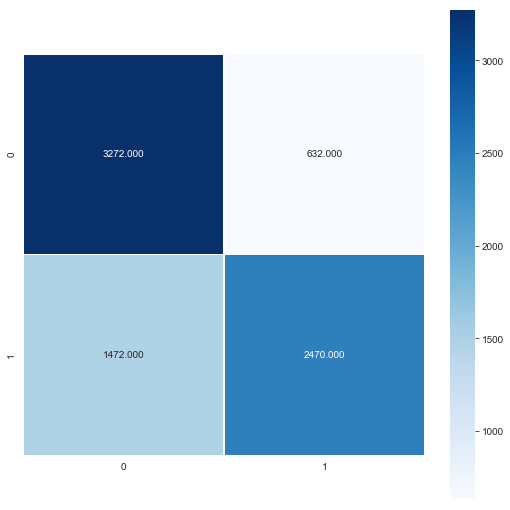

In [116]:
#confusion matrix visualization of train data
cm_lr = confusion_matrix(y_train, final_preds_train)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [117]:
# Predictions and Evaluation of Decision Tree on Testing Set

print(classification_report(y_test, final_preds_test))
print(confusion_matrix(y_test, final_preds_test))

              precision    recall  f1-score   support

           0       0.71      0.84      0.77      1000
           1       0.80      0.64      0.71       962

   micro avg       0.74      0.74      0.74      1962
   macro avg       0.75      0.74      0.74      1962
weighted avg       0.75      0.74      0.74      1962

[[842 158]
 [344 618]]


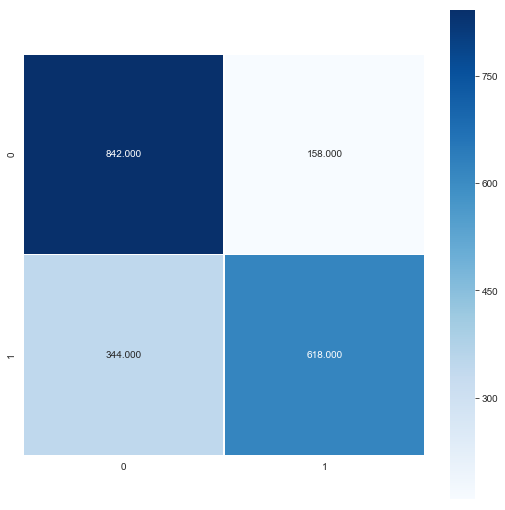

In [118]:
#confusion matrix visualization of train data
cm_lr = confusion_matrix(y_test, final_preds_test)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

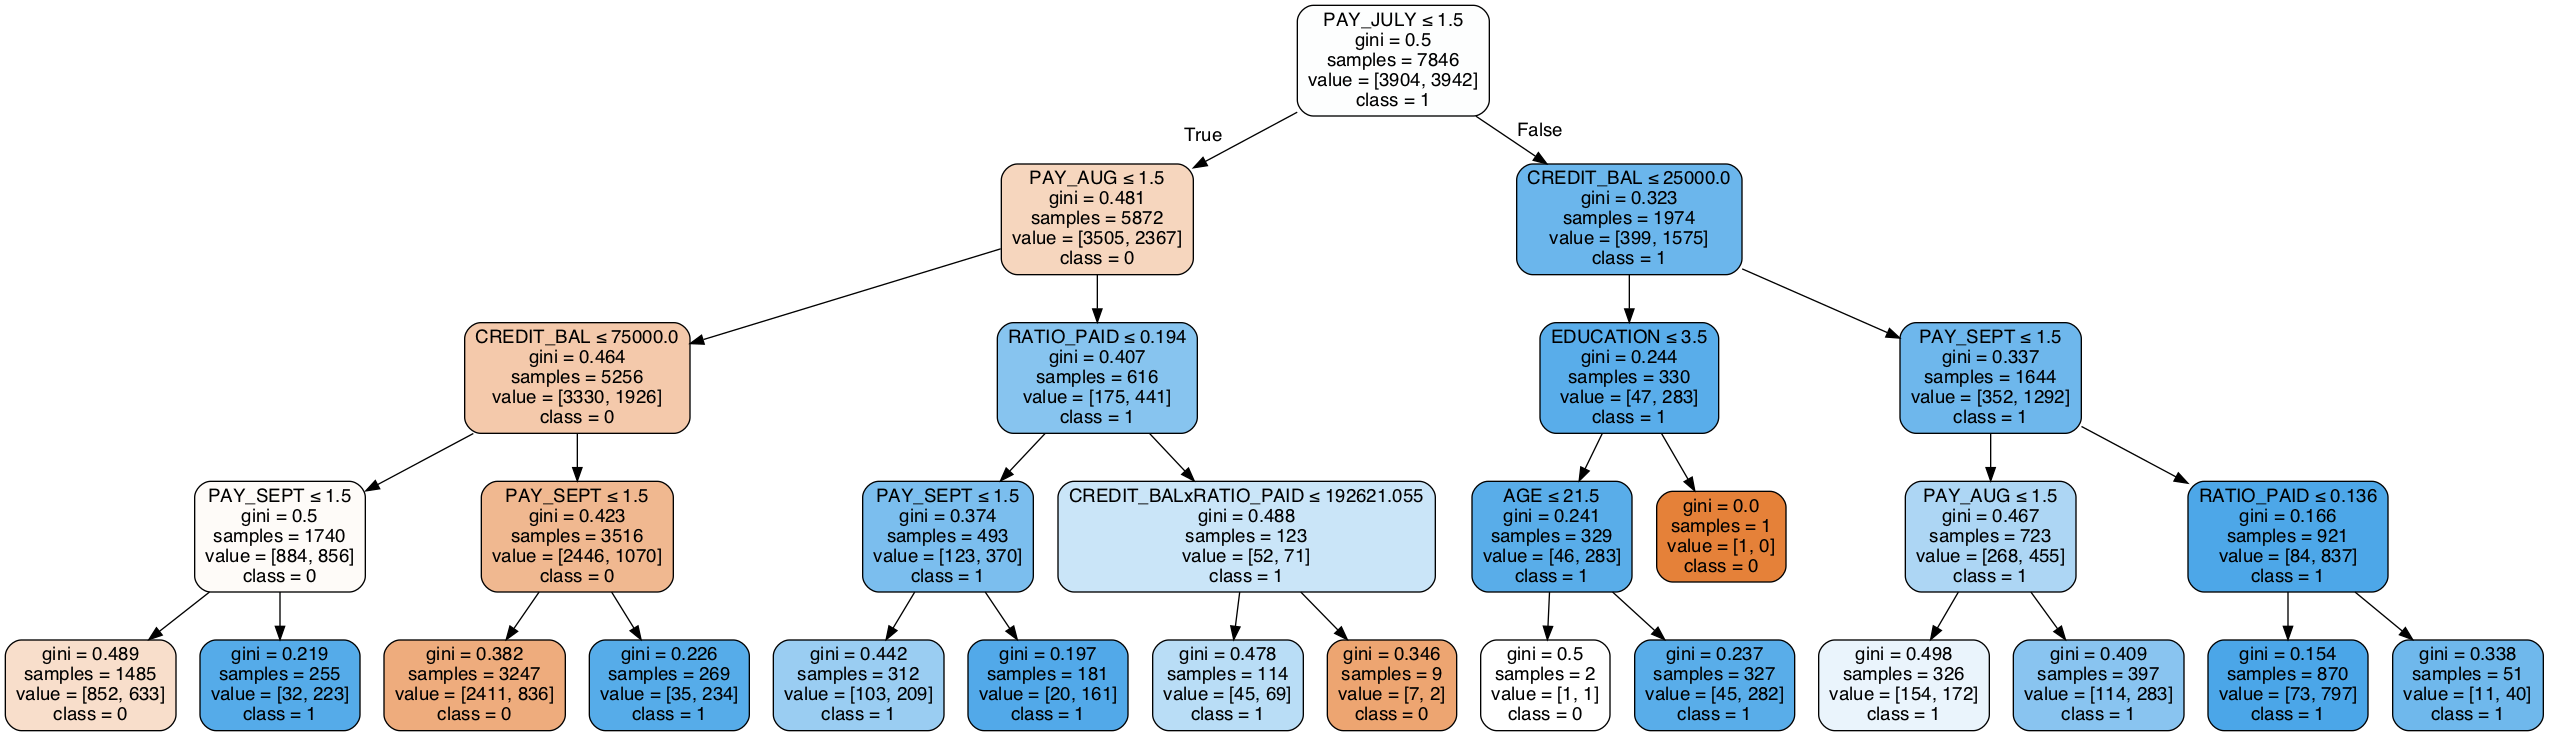

In [121]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(final_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_train.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('default_payments.png')
Image(graph.create_png())

## 8. Document in the markdown cells below how you did paired programming.

### How we did paired programming:
- !!!

Additional details on paired programming:

In [75]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 23, n_estimators=100, max_depth=8)

In [76]:
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=23, verbose=0, warm_start=False)

In [77]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)

In [78]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=23, verbose=0, warm_start=False)

In [80]:
from sklearn.metrics import accuracy_score
rfc_pred = rfc.predict(X_test)


# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, rfc_pred))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, rfc_pred))

Test Accuracy score:  0.7279771615008157
Test F1 score:  0.6996848266546601


In [81]:
param_grid = {
    'n_estimators': [200, 300, 400],
    'max_features': [0.25, 0.33, 0.5],
    'max_depth': [5, 6, 7, 8, 9],
    'min_samples_leaf': [0.03, 0.04, 0.05, 0.06]
}

In [82]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,n_jobs=-1)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=23, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [200, 300, 400], 'max_features': [0.25, 0.33, 0.5], 'max_depth': [5, 6, 7, 8, 9], 'min_samples_leaf': [0.03, 0.04, 0.05, 0.06]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [83]:
CV_rfc.best_params_

{'max_depth': 8,
 'max_features': 0.25,
 'min_samples_leaf': 0.03,
 'n_estimators': 300}

In [84]:
rfc_pred = CV_rfc.best_estimator_.predict(X_test)


# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, rfc_pred))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, rfc_pred))

Test Accuracy score:  0.7267536704730831
Test F1 score:  0.6920955882352942
